### Datasets 4 (Large-Scale Characterization of Phosphorylation-Induced Conformational and Stability Changes in Breast Cancer(https://www.ebi.ac.uk/pride/archive/projects/PXD007878)) ###

In [1]:
from pylab import *
from Bio import SeqIO
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
import pandas as pd
import re
import numpy as np
pd.options.mode.chained_assignment = None 
import io
from io import StringIO

In [2]:
#C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\Dataser 4\\sd2_1\\txt\\allPeptides.txt
Data=input("please load data:")
df = pd.read_csv(Data, sep="\t" ,low_memory=False) # read in the dataframe
df

please load data: C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\Dataser 4\\sd2_1\\txt\\allPeptides.txt


,Raw file,Type,Charge,m/z,Mass,Uncalibrated m/z,Resolution,Number of data points,Number of scans,Number of isotopic peaks,...,Ratio H/L normalized,Intensity,Intensity L,Intensity H,Intensities L,Intensities H,MS/MS Count,MSMS Scan Numbers,MSMS SILAC States,MSMS Isotope Indices
0,ID22716_01_E749_4122_040816,MULTI,1,509.48190,508.47463,509.48390,49605.34,386,157,5,...,1.24680,3255500.0,1573000.0,1682500.0,NaN,NaN,0,NaN,NaN,NaN
1,ID22716_01_E749_4122_040816,MULTI,1,483.25725,482.24998,483.25914,54039.69,92,45,4,...,1.22530,2889500.0,1357800.0,1531700.0,NaN,NaN,0,NaN,NaN,NaN
2,ID22716_01_E749_4122_040816,MULTI,1,445.27856,444.27129,445.28019,51282.50,221,93,4,...,1.02030,3995700.0,1799800.0,2195900.0,NaN,NaN,0,NaN,NaN,NaN
3,ID22716_01_E749_4122_040816,MULTI,1,413.32543,412.31815,413.32693,55124.23,110,61,3,...,0.56849,1085300.0,507440.0,577890.0,NaN,NaN,0,NaN,NaN,NaN
4,ID22716_01_E749_4122_040816,MULTI,1,783.43999,782.43272,783.44184,40450.90,59,17,4,...,1.19910,22820000.0,10921000.0,11900000.0,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24483,ID22716_01_E749_4122_040816,ISO,1,503.10429,502.09702,NaN,NaN,2654,909,3,...,NaN,NaN,NaN,NaN,NaN,NaN,2,55432;55593,NaN,79494;79494
24484,ID22716_01_E749_4122_040816,ISO,1,519.13494,518.12767,NaN,NaN,4681,946,5,...,NaN,NaN,NaN,NaN,NaN,NaN,1,55341,NaN,79497
24485,ID22716_01_E749_4122_040816,ISO,1,536.16154,535.15426,NaN,NaN,4560,946,5,...,NaN,NaN,NaN,NaN,NaN,NaN,1,55123,NaN,79499
24486,ID22716_01_E749_4122_040816,ISO,1,610.18486,609.17758,NaN,NaN,14,6,3,...,NaN,NaN,NaN,NaN,NaN,NaN,1,54940,NaN,79502


In [3]:
df = df.drop_duplicates(subset='Sequence', keep="first") #REMOVE DUPLICATES
df

,Raw file,Type,Charge,m/z,Mass,Uncalibrated m/z,Resolution,Number of data points,Number of scans,Number of isotopic peaks,...,Ratio H/L normalized,Intensity,Intensity L,Intensity H,Intensities L,Intensities H,MS/MS Count,MSMS Scan Numbers,MSMS SILAC States,MSMS Isotope Indices
0,ID22716_01_E749_4122_040816,MULTI,1,509.48190,508.47463,509.48390,49605.34,386,157,5,...,1.24680,3255500.0,1573000.0,1682500.0,NaN,NaN,0,NaN,NaN,NaN
135,ID22716_01_E749_4122_040816,MULTI,1,801.48321,800.47593,801.48508,40754.23,35,13,4,...,1.06030,8536900.0,4370100.0,4166800.0,NaN,NaN,1,15012,1,0
675,ID22716_01_E749_4122_040816,MULTI,2,1057.02380,2112.03310,1057.02600,35522.28,20,7,4,...,0.65098,10626000.0,6445900.0,4180000.0,NaN,NaN,1,19211,1,1
677,ID22716_01_E749_4122_040816,MULTI,2,639.34178,1276.66900,639.34407,42982.11,70,20,4,...,1.10840,36186000.0,19088000.0,17098000.0,NaN,NaN,2,36753;36712,0;1,0;0
678,ID22716_01_E749_4122_040816,MULTI,2,499.32917,996.64378,499.33085,50357.27,82,20,6,...,1.10410,31720000.0,14220000.0,17500000.0,NaN,NaN,2,22371;22380,0;1,0;0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10037,ID22716_01_E749_4122_040816,MULTI,5,437.05611,2180.24420,437.05759,52280.28,110,17,9,...,1.20920,35015000.0,15076000.0,19938000.0,NaN,NaN,2,22885;22907,0;1,1;0
10167,ID22716_01_E749_4122_040816,MULTI,5,502.08312,2505.37920,502.08434,47448.05,64,15,6,...,0.93054,21769000.0,13022000.0,8747600.0,NaN,NaN,2,39506;39497,0;1,1;0
10171,ID22716_01_E749_4122_040816,MULTI,5,401.79394,2003.93330,401.79510,55847.59,107,20,8,...,0.81771,14701000.0,8291200.0,6410100.0,NaN,NaN,1,23569,0,1
10368,ID22716_01_E749_4122_040816,MULTI,5,543.87745,2714.35090,543.87949,47654.88,129,21,10,...,0.51719,23710000.0,16081000.0,7628700.0,NaN,NaN,2,46721;46760,0;1,1;2


In [4]:
all_protein= []   #list of protein names
for proteins in df['Proteins']:
    all_protein.append(proteins)

In [5]:
#remove nan
all_protein = [x for x in all_protein if not isinstance(x, float) or not math.isnan(x)]
# Split elements with protein IDs separated by semicolon (;)
all_protein = [item for sublist in [x.split(';') if ';' in x else [x] for x in all_protein] for item in sublist]
#remove empty strings elememts
all_protein = [element for element in all_protein if element != ' ']

In [6]:
protein_names = [] #list of all unique protein names
for p in all_protein:
    if p not in protein_names:
        protein_names.append(p)

In [7]:
len(all_protein)

11470

In [8]:
len(protein_names)

2817

In [9]:
with open('protein_names.txt', 'w') as f: #write protein names to file
    for proteins in protein_names: #for each protein in the list
        #for protein in proteins: #for each protein in the list
            f.write("%s\n" % proteins) #write each protein to file

In [10]:
df= df.filter(['Sequence', 'Proteins', 'Modifications']) #filter dataframe to only include protein names and sequences
df

,Sequence,Proteins,Modifications
0,,,
135,ALQASALK,J3KPS3;H3BQN4;H3BR68;P04075,Unmodified
675,LQSIGTENTEENRRFYR,J3KPS3;H3BMQ8;H3BPS8;H3BQN4;H3BR04;H3BUH7;P04075,Unmodified
677,ANTFVAELKGLD,G3XAL0;P40926,Unmodified
678,VAILKANLR,P55072,Unmodified
...,...,...,...
10037,VYNVTQHAVGIVVNKQVKGK,M0R181;P46778,Unmodified
10167,VYSYALALKHANAKPFEVPFLK,Q9UKK9;A6NFX8,Unmodified
10171,ALCTGEKGFGYKGSTFHR,H0Y548;P30405;Q2YDB7,Unmodified
10368,VPFSLLRGPSWDPFRDWYPHSR,F8WE04;P04792,Unmodified


In [11]:
#C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\ID_Dataset4.tsv
IDs=input("please load IDs:")
proteinID = pd.read_csv(IDs, sep="\t") #read in protein ID file
proteinID=proteinID.rename(columns={'From': 'ProteinID'})
proteinID

please load IDs: C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\ID_Dataset4.tsv


,ProteinID,Entry
0,P04075,P04075
1,P40926,P40926
2,P55072,P55072
3,P60709,P60709
4,P62736,P62736
...,...,...
1349,P62273-2,P62273-2
1350,P62314,P62314
1351,Q9UKK9,Q9UKK9
1352,P30405,P30405


In [12]:
proteinID = proteinID.drop_duplicates(subset='ProteinID', keep="first")
proteinID.to_csv('ID_Dataset4.tsv', sep="\t", index=False)
proteinID

,ProteinID,Entry
0,P04075,P04075
1,P40926,P40926
2,P55072,P55072
3,P60709,P60709
4,P62736,P62736
...,...,...
1349,P62273-2,P62273-2
1350,P62314,P62314
1351,Q9UKK9,Q9UKK9
1352,P30405,P30405


In [13]:
df = df.merge(proteinID, left_on='Proteins', right_on='ProteinID', how='left') #merge protein names with protein ID
df

,Sequence,Proteins,Modifications,ProteinID,Entry
0,,,,NaN,NaN
1,ALQASALK,J3KPS3;H3BQN4;H3BR68;P04075,Unmodified,NaN,NaN
2,LQSIGTENTEENRRFYR,J3KPS3;H3BMQ8;H3BPS8;H3BQN4;H3BR04;H3BUH7;P04075,Unmodified,NaN,NaN
3,ANTFVAELKGLD,G3XAL0;P40926,Unmodified,NaN,NaN
4,VAILKANLR,P55072,Unmodified,P55072,P55072
...,...,...,...,...,...
2441,VYNVTQHAVGIVVNKQVKGK,M0R181;P46778,Unmodified,NaN,NaN
2442,VYSYALALKHANAKPFEVPFLK,Q9UKK9;A6NFX8,Unmodified,NaN,NaN
2443,ALCTGEKGFGYKGSTFHR,H0Y548;P30405;Q2YDB7,Unmodified,NaN,NaN
2444,VPFSLLRGPSWDPFRDWYPHSR,F8WE04;P04792,Unmodified,NaN,NaN


In [14]:
df.to_csv('merged_proteins_Dataset4.tsv', sep="\t", index=False) #write merged dataframe to file

In [15]:
df= df.filter(['Sequence', 'Proteins', 'Modifications' , 'Entry']) #remove columns that are not needed
df= df[df['Entry'].notnull()] #remove rows with null values
df

,Sequence,Proteins,Modifications,Entry
4,VAILKANLR,P55072,Unmodified,P55072
13,AAAAVVAAAAR,Q8WWH5,Unmodified,Q8WWH5
29,LTDEEVEMTR,Q10713,Oxidation (M),Q10713
32,VGVNGFGR,P04406,Deamidation (NQ),P04406
37,YYLAPKIEDEEGS,P12004,Unmodified,P12004
...,...,...,...,...
2403,KIQALQQQADEAEDRAQGLQR,P67936,Unmodified,P67936
2404,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,Q9H3K6
2407,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,Q08380
2419,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,Q9Y676


In [16]:
#C:\\Users\\ahmad\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\protein_seq_Dataset4.fasta
protein_seq=input("please load protein_seq:")


with open(protein_seq) as fasta_file:  # Will close handle cleanly
    identifiers = []
    seq = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        seq.append(seq_record.seq)

please load protein_seq: C:\\Users\\ahmad\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\protein_seq_Dataset4.fasta


In [17]:
new_df = pd.DataFrame({'Identifier': identifiers, 'Protein_Sequence': seq}) #create new dataframe with identifiers and sequences

proteinID = r'sp\|(.*)\|.*' #regular expression to extract protein ID
new_df['Identifier'] = [re.sub(proteinID, r'\1', x) for x in new_df['Identifier']] #remove protein ID from identifier

def list_to_string(list):   #convert list to string
    return ','.join(list)   #join list with ','
new_df['Protein_Sequence'] = new_df['Protein_Sequence'].apply(list_to_string) #convert list to string

#df['col'].apply(', '.join)

new_df['Protein_Sequence'] = new_df['Protein_Sequence'].str.replace(',', '') #remove ',' from string
new_df

,Identifier,Protein_Sequence
0,P04075,MPYQYPALTPEQKKELSDIAHRIVAPGKGILAADESTGSIAKRLQS...
1,P40926,MLSALARPASAALRRSFSTSAQNNAKVAVLGASGGIGQPLSLLLKN...
2,P55072,MASGADSKGDDLSTAILKQKNRPNRLIVDEAINEDNSVVSLSQPKM...
3,P60709,MDDDIAALVVDNGSGMCKAGFAGDDAPRAVFPSIVGRPRHQGVMVG...
4,P62736,MCEEEDSTALVCDNGSGLCKAGFAGDDAPRAVFPSIVGRPRHQGVM...
...,...,...
1349,P62273-2,MGHQQLYWSHPRKFGQGSRSCRVCSNRHGLIRKYGLNMCRQCFRQY...
1350,P62314,MKLVRFLMKLSHETVTIELKNGTQVHGTITGVDVSMNTHLKAVKMT...
1351,Q9UKK9,MESQEPTESSQNGKQYIISEELISEGKWVKLEKTTYMDPTGKTRTW...
1352,P30405,MLALRCGSRWLGLLSVPRSVPLRLPAARACSKGSGDPSSSSSSGNP...


In [18]:
new_df.to_csv('check_seq_Dataset4.tsv', sep="\t", index=False) 

In [19]:
#df = df.merge(proteinID, left_on='Proteins', right_on='ProteinID', how='left') #merge protein names with protein ID


df= df.merge(new_df, left_on='Entry', right_on='Identifier', how='left') #merge protein names with protein ID
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence
0,VAILKANLR,P55072,Unmodified,P55072,P55072,MASGADSKGDDLSTAILKQKNRPNRLIVDEAINEDNSVVSLSQPKM...
1,AAAAVVAAAAR,Q8WWH5,Unmodified,Q8WWH5,Q8WWH5,MAASEAAVVSSPSLKTDTSPVLETAGTVAAMAATPSARAAAAVVAA...
2,LTDEEVEMTR,Q10713,Oxidation (M),Q10713,Q10713,MAAVVLAATRLLRGSGSWGCSRLRFGPPAYRRFSSGGAYPNIPLSS...
3,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...
4,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...
...,...,...,...,...,...,...
437,KIQALQQQADEAEDRAQGLQR,P67936,Unmodified,P67936,P67936,MAGLNSLEAVKRKIQALQQQADEAEDRAQGLQRELDGERERREKAE...
438,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,Q9H3K6,Q9H3K6,MELSAEYLREKLQRDLEAEHVEVEDTTLNRCSCSFRVLVVSAKFEG...
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,Q08380,Q08380,MTPPRLFWVWLLVAGTQGVNDGDMRLADGGATNQGRVEIFYRGQWG...
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,Q9Y676,Q9Y676,MAASVLNTVLRRLPMLSLFRGSHRVQVPLQTLCTKAPSEEDSLSSV...


In [20]:
def check_Sequence_in_Protein_Sequence(row): #function to check if sequence is in full sequence
    if row['Sequence'] in row['Protein_Sequence']:
        return True
    else:
        return False

In [21]:
df['Check'] = df.apply(check_Sequence_in_Protein_Sequence, axis=1) #apply function to dataframe
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check
0,VAILKANLR,P55072,Unmodified,P55072,P55072,MASGADSKGDDLSTAILKQKNRPNRLIVDEAINEDNSVVSLSQPKM...,True
1,AAAAVVAAAAR,Q8WWH5,Unmodified,Q8WWH5,Q8WWH5,MAASEAAVVSSPSLKTDTSPVLETAGTVAAMAATPSARAAAAVVAA...,True
2,LTDEEVEMTR,Q10713,Oxidation (M),Q10713,Q10713,MAAVVLAATRLLRGSGSWGCSRLRFGPPAYRRFSSGGAYPNIPLSS...,True
3,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True
4,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True
...,...,...,...,...,...,...,...
437,KIQALQQQADEAEDRAQGLQR,P67936,Unmodified,P67936,P67936,MAGLNSLEAVKRKIQALQQQADEAEDRAQGLQRELDGERERREKAE...,True
438,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,Q9H3K6,Q9H3K6,MELSAEYLREKLQRDLEAEHVEVEDTTLNRCSCSFRVLVVSAKFEG...,True
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,Q08380,Q08380,MTPPRLFWVWLLVAGTQGVNDGDMRLADGGATNQGRVEIFYRGQWG...,True
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,Q9Y676,Q9Y676,MAASVLNTVLRRLPMLSLFRGSHRVQVPLQTLCTKAPSEEDSLSSV...,True


In [22]:
df['Check'].value_counts() #count number of trues and falses

True     441
False      1
Name: Check, dtype: int64

In [23]:
df = df[df.Check != False] #remove rows that are false

df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check
0,VAILKANLR,P55072,Unmodified,P55072,P55072,MASGADSKGDDLSTAILKQKNRPNRLIVDEAINEDNSVVSLSQPKM...,True
1,AAAAVVAAAAR,Q8WWH5,Unmodified,Q8WWH5,Q8WWH5,MAASEAAVVSSPSLKTDTSPVLETAGTVAAMAATPSARAAAAVVAA...,True
2,LTDEEVEMTR,Q10713,Oxidation (M),Q10713,Q10713,MAAVVLAATRLLRGSGSWGCSRLRFGPPAYRRFSSGGAYPNIPLSS...,True
3,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True
4,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True
...,...,...,...,...,...,...,...
437,KIQALQQQADEAEDRAQGLQR,P67936,Unmodified,P67936,P67936,MAGLNSLEAVKRKIQALQQQADEAEDRAQGLQRELDGERERREKAE...,True
438,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,Q9H3K6,Q9H3K6,MELSAEYLREKLQRDLEAEHVEVEDTTLNRCSCSFRVLVVSAKFEG...,True
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,Q08380,Q08380,MTPPRLFWVWLLVAGTQGVNDGDMRLADGGATNQGRVEIFYRGQWG...,True
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,Q9Y676,Q9Y676,MAASVLNTVLRRLPMLSLFRGSHRVQVPLQTLCTKAPSEEDSLSSV...,True


In [24]:
def peptide_start_position(protein, peptide): #This function finds the start position of the peptide in the protein sequence   
    for p in peptide:
        start_position= protein.find(peptide) #find start position of peptide in protein sequence  
        return start_position+1 #return start position of peptide in protein sequence

def peptide_end_position(protein, peptide): #This function finds the end position of the peptide in the protein sequence
    for p in peptide: 
        start_position= protein.find(peptide) #find start position of peptide in protein sequence
        end_position= start_position+len(peptide)-1 #find end position of peptide in protein sequence
        return end_position+1 #return end position of peptide

def find_peptide(protein, peptide): #This function finds the next AA after the peptide in the protein sequence
    try:
        position = protein.find(peptide) #find position of peptide in protein sequence
        next_position= position+len(str(peptide)) #find next position of peptide in protein sequence
        return protein[next_position]   #return next AA of peptide
        
    except:
        return ''

def find_last_AA(protein, peptide): #This function finds the last AA of the peptide in the protein sequence
    
    try:
        position = protein.find(peptide) #find position of peptide in protein sequence
        last_position_amino_acid= position + len(peptide)-1 #find last position of peptide in protein sequence

        return protein[last_position_amino_acid] #return last AA of peptide
    except:
        return ''

def next_2_AA(protein, peptide): #This function finds the next 2 AA after the peptide in the protein sequence
    try:
        position = protein.find(peptide) #find position of peptide in protein sequence
        last_position_amino_acid= position + len(peptide)-1 #find last position of peptide in protein sequence
        next_position= position+len(str(peptide)) #find next position of peptide in protein sequence
        return protein[last_position_amino_acid:next_position+1] #return next 5 AA of peptide
    except:
        return ''    


In [25]:
df['start']= df.apply(lambda row: peptide_start_position(row['Protein_Sequence'], row['Sequence']), axis=1) #apply function to dataframe
df['end']= df.apply(lambda row: peptide_end_position(row['Protein_Sequence'], row['Sequence']), axis=1) 
df['last_AA']= df.apply(lambda row: find_last_AA(row['Protein_Sequence'], row['Sequence']), axis=1)
df['next_AA']= df.apply(lambda row: find_peptide(row['Protein_Sequence'], row['Sequence']), axis=1)
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA
0,VAILKANLR,P55072,Unmodified,P55072,P55072,MASGADSKGDDLSTAILKQKNRPNRLIVDEAINEDNSVVSLSQPKM...,True,654,662,R,K
1,AAAAVVAAAAR,Q8WWH5,Unmodified,Q8WWH5,Q8WWH5,MAASEAAVVSSPSLKTDTSPVLETAGTVAAMAATPSARAAAAVVAA...,True,39,49,R,T
2,LTDEEVEMTR,Q10713,Oxidation (M),Q10713,Q10713,MAAVVLAATRLLRGSGSWGCSRLRFGPPAYRRFSSGGAYPNIPLSS...,True,176,185,R,M
3,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True,6,13,R,I
4,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True,6,13,R,I
...,...,...,...,...,...,...,...,...,...,...,...
437,KIQALQQQADEAEDRAQGLQR,P67936,Unmodified,P67936,P67936,MAGLNSLEAVKRKIQALQQQADEAEDRAQGLQRELDGERERREKAE...,True,13,33,R,E
438,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,Q9H3K6,Q9H3K6,MELSAEYLREKLQRDLEAEHVEVEDTTLNRCSCSFRVLVVSAKFEG...,True,53,73,K,T
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,Q08380,Q08380,MTPPRLFWVWLLVAGTQGVNDGDMRLADGGATNQGRVEIFYRGQWG...,True,456,475,R,V
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,Q9Y676,Q9Y676,MAASVLNTVLRRLPMLSLFRGSHRVQVPLQTLCTKAPSEEDSLSSV...,True,157,173,R,D


In [26]:
df = df[df.Protein_Sequence != ''] #remove rows with empty protein sequences

In [27]:
p_count= (df['next_AA'] == 'P').sum() #count number of P's
p_count

1

In [28]:
reg= r".*[RK]P.*" #regular expression to find R|K P
df_RK= df[df.Sequence.str.match(reg)] #filter dataframe to only include peptides with R|K P
df_RK

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA
32,TLRPALVGVVKEA,Q9HAV7,Unmodified,Q9HAV7,Q9HAV7,MAAQCVRLARRSLPALALSLRPSPRLLCTATKQKNSGQNLEEDMGQ...,True,205,217,A,
36,MLQPCGPPADKPEEN,Q9BWJ5,Oxidation (M),Q9BWJ5,Q9BWJ5,MTDRYTIHSQLEHLQSKYIGTGHADTTKWEWLVNQHRDSYCSYMGH...,True,72,86,N,
121,IEVEKPFAIAKE,P23284,Unmodified,P23284,P23284,MLRLSERNMKVLLAAALIAGSVFFLLLPGPSAADEKKKGPKVTVKV...,True,205,216,E,
149,STMKPVQKVLEDSDLK,P11021,Oxidation (M),P11021,P11021,MKLSLVAAMLLLLSAARAEEEDKKEDVGTVVGIDLGTTYSCVGVFK...,True,337,352,K,K
154,TKPYIQVDIGGGQTK,P11021,Unmodified,P11021,P11021,MKLSLVAAMLLLLSAARAEEEDKKEDVGTVVGIDLGTTYSCVGVFK...,True,124,138,K,T
155,KTKPYIQVDIGGGQTK,P11021,Unmodified,P11021,P11021,MKLSLVAAMLLLLSAARAEEEDKKEDVGTVVGIDLGTTYSCVGVFK...,True,123,138,K,T
161,DAADKPRGFAR,Q13185,Unmodified,Q13185,Q13185,MASNKTTLQKMGKKQNGKSKKVEEAEPEEFVVEKVLDRRVVNGKVE...,True,109,119,R,G
164,VKPAPDETSFSEALLKR,Q12905,Unmodified,Q12905,Q12905,MRGDRGRGRGGRFGSRGGPGGGFRPFVPHIPFDFYLCEMAFPRVKP...,True,44,60,R,N
170,LKPGYLEATVDWFRR,Q15181,Unmodified,Q15181,Q15181,MSGFSTEERAAPFSLEYRVFLKNEKGQYISPFHDIPIYADKDVFHM...,True,178,192,R,Y
172,TLRPALVGVVK,Q9HAV7,Unmodified,Q9HAV7,Q9HAV7,MAAQCVRLARRSLPALALSLRPSPRLLCTATKQKNSGQNLEEDMGQ...,True,205,215,K,E


In [29]:
df_RK['next_AA'].value_counts() 

     6
T    5
G    2
Y    2
V    2
K    1
N    1
E    1
L    1
M    1
C    1
R    1
Q    1
F    1
S    1
Name: next_AA, dtype: int64

In [30]:
df['extended_peptide']= df.apply(lambda row: next_2_AA(row['Protein_Sequence'], row['Sequence']), axis=1) #add last AA of peptide and next AA
df_p= df.loc[lambda x: x['extended_peptide'].str.contains(reg , regex=True)] #find rows that contain R|K P

In [31]:
df_p.loc[df_p['last_AA'] == 'Q'] #find rows where last AA is Q, just to check dataframe

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide


In [32]:
total= len(df_RK) #Sum of rows with R|K P pattern in peptide sequence 
print(total)
print(p_count)

27
1


In [33]:
df['cleavage_sites'] = df['Sequence'].str.findall(r".(?:(?<![KR](?!P)).)*") #find all cleavage sites in peptide sequence
df['cleavage_sites'] = [','.join(map(str, l)) for l in df['cleavage_sites']] #convert list to string
df['missed'] = df.cleavage_sites.str.count(',') #count number of missed cleavage sites
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide,cleavage_sites,missed
0,VAILKANLR,P55072,Unmodified,P55072,P55072,MASGADSKGDDLSTAILKQKNRPNRLIVDEAINEDNSVVSLSQPKM...,True,654,662,R,K,RK,"VAILK,ANLR",1
1,AAAAVVAAAAR,Q8WWH5,Unmodified,Q8WWH5,Q8WWH5,MAASEAAVVSSPSLKTDTSPVLETAGTVAAMAATPSARAAAAVVAA...,True,39,49,R,T,RT,AAAAVVAAAAR,0
2,LTDEEVEMTR,Q10713,Oxidation (M),Q10713,Q10713,MAAVVLAATRLLRGSGSWGCSRLRFGPPAYRRFSSGGAYPNIPLSS...,True,176,185,R,M,RM,LTDEEVEMTR,0
3,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True,6,13,R,I,RI,VGVNGFGR,0
4,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True,6,13,R,I,RI,VGVNGFGR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,KIQALQQQADEAEDRAQGLQR,P67936,Unmodified,P67936,P67936,MAGLNSLEAVKRKIQALQQQADEAEDRAQGLQRELDGERERREKAE...,True,13,33,R,E,RE,"K,IQALQQQADEAEDR,AQGLQR",2
438,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,Q9H3K6,Q9H3K6,MELSAEYLREKLQRDLEAEHVEVEDTTLNRCSCSFRVLVVSAKFEG...,True,53,73,K,T,KT,"HR,LVNACLAEELPHIHAFEQK",1
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,Q08380,Q08380,MTPPRLFWVWLLVAGTQGVNDGDMRLADGGATNQGRVEIFYRGQWG...,True,456,475,R,V,RV,"YPYQSFQTPQHPSFLFQDK,R",1
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,Q9Y676,Q9Y676,MAASVLNTVLRRLPMLSLFRGSHRVQVPLQTLCTKAPSEEDSLSSV...,True,157,173,R,D,RD,"AR,DHGLLIYHIPQVEPR",1


In [34]:
cleavage= r".*?([RK]),.*"
second_cleavage= r".*[RK],.*([RK]),.*"
df['MS_AA']= df.cleavage_sites.str.findall(cleavage)
df['MS_AA']= df['MS_AA'].apply(list_to_string)
df['2nd_cleavage']= df.cleavage_sites.str.findall(second_cleavage)
df['2nd_cleavage']= df['2nd_cleavage'].apply(list_to_string)
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage
0,VAILKANLR,P55072,Unmodified,P55072,P55072,MASGADSKGDDLSTAILKQKNRPNRLIVDEAINEDNSVVSLSQPKM...,True,654,662,R,K,RK,"VAILK,ANLR",1,K,
1,AAAAVVAAAAR,Q8WWH5,Unmodified,Q8WWH5,Q8WWH5,MAASEAAVVSSPSLKTDTSPVLETAGTVAAMAATPSARAAAAVVAA...,True,39,49,R,T,RT,AAAAVVAAAAR,0,,
2,LTDEEVEMTR,Q10713,Oxidation (M),Q10713,Q10713,MAAVVLAATRLLRGSGSWGCSRLRFGPPAYRRFSSGGAYPNIPLSS...,True,176,185,R,M,RM,LTDEEVEMTR,0,,
3,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True,6,13,R,I,RI,VGVNGFGR,0,,
4,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True,6,13,R,I,RI,VGVNGFGR,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,KIQALQQQADEAEDRAQGLQR,P67936,Unmodified,P67936,P67936,MAGLNSLEAVKRKIQALQQQADEAEDRAQGLQRELDGERERREKAE...,True,13,33,R,E,RE,"K,IQALQQQADEAEDR,AQGLQR",2,K,R
438,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,Q9H3K6,Q9H3K6,MELSAEYLREKLQRDLEAEHVEVEDTTLNRCSCSFRVLVVSAKFEG...,True,53,73,K,T,KT,"HR,LVNACLAEELPHIHAFEQK",1,R,
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,Q08380,Q08380,MTPPRLFWVWLLVAGTQGVNDGDMRLADGGATNQGRVEIFYRGQWG...,True,456,475,R,V,RV,"YPYQSFQTPQHPSFLFQDK,R",1,K,
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,Q9Y676,Q9Y676,MAASVLNTVLRRLPMLSLFRGSHRVQVPLQTLCTKAPSEEDSLSSV...,True,157,173,R,D,RD,"AR,DHGLLIYHIPQVEPR",1,R,


In [35]:
missed_cleavage= r".*?([RK]),.*"

In [36]:
def split_cleavage_sites(row):  #function to split  cleavage sites
    if row == 'nan':
        return row
    else:
        return row.split(',')

def second_split(cs_split): #function to seperate 2nd cleavage site
    if len(cs_split) >2:
        return cs_split[1]
    else:
        return ''

In [37]:
df['cs_split'] = df['cleavage_sites'].apply(split_cleavage_sites) #split cleavage sites
df['first_half']= df['cs_split'].apply(lambda x: x[0]) # first half of cleavage sites
df['second_half']= df['cs_split'].apply(second_split) #second half of cleavage sites
df


,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage,cs_split,first_half,second_half
0,VAILKANLR,P55072,Unmodified,P55072,P55072,MASGADSKGDDLSTAILKQKNRPNRLIVDEAINEDNSVVSLSQPKM...,True,654,662,R,K,RK,"VAILK,ANLR",1,K,,"[VAILK, ANLR]",VAILK,
1,AAAAVVAAAAR,Q8WWH5,Unmodified,Q8WWH5,Q8WWH5,MAASEAAVVSSPSLKTDTSPVLETAGTVAAMAATPSARAAAAVVAA...,True,39,49,R,T,RT,AAAAVVAAAAR,0,,,[AAAAVVAAAAR],AAAAVVAAAAR,
2,LTDEEVEMTR,Q10713,Oxidation (M),Q10713,Q10713,MAAVVLAATRLLRGSGSWGCSRLRFGPPAYRRFSSGGAYPNIPLSS...,True,176,185,R,M,RM,LTDEEVEMTR,0,,,[LTDEEVEMTR],LTDEEVEMTR,
3,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True,6,13,R,I,RI,VGVNGFGR,0,,,[VGVNGFGR],VGVNGFGR,
4,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True,6,13,R,I,RI,VGVNGFGR,0,,,[VGVNGFGR],VGVNGFGR,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,KIQALQQQADEAEDRAQGLQR,P67936,Unmodified,P67936,P67936,MAGLNSLEAVKRKIQALQQQADEAEDRAQGLQRELDGERERREKAE...,True,13,33,R,E,RE,"K,IQALQQQADEAEDR,AQGLQR",2,K,R,"[K, IQALQQQADEAEDR, AQGLQR]",K,IQALQQQADEAEDR
438,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,Q9H3K6,Q9H3K6,MELSAEYLREKLQRDLEAEHVEVEDTTLNRCSCSFRVLVVSAKFEG...,True,53,73,K,T,KT,"HR,LVNACLAEELPHIHAFEQK",1,R,,"[HR, LVNACLAEELPHIHAFEQK]",HR,
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,Q08380,Q08380,MTPPRLFWVWLLVAGTQGVNDGDMRLADGGATNQGRVEIFYRGQWG...,True,456,475,R,V,RV,"YPYQSFQTPQHPSFLFQDK,R",1,K,,"[YPYQSFQTPQHPSFLFQDK, R]",YPYQSFQTPQHPSFLFQDK,
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,Q9Y676,Q9Y676,MAASVLNTVLRRLPMLSLFRGSHRVQVPLQTLCTKAPSEEDSLSSV...,True,157,173,R,D,RD,"AR,DHGLLIYHIPQVEPR",1,R,,"[AR, DHGLLIYHIPQVEPR]",AR,


In [38]:
def cs_split(first_half, start, MS_AA):
    if MS_AA == '':
        return 0 
    else:
        return start + len(first_half)-1
        


def split_second(first_half, start, MS_AA):
    if MS_AA == '':
        return 0 
    else:
        return start + len(first_half)

In [39]:
df['position_MS']= df.apply(lambda row: cs_split(row['first_half'], row['start'], row['MS_AA']), axis=1)
df['2nd_MS'] = df.apply(lambda row: split_second(row['second_half'], row['position_MS'], row['2nd_cleavage']), axis=1)
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,...,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage,cs_split,first_half,second_half,position_MS,2nd_MS
0,VAILKANLR,P55072,Unmodified,P55072,P55072,MASGADSKGDDLSTAILKQKNRPNRLIVDEAINEDNSVVSLSQPKM...,True,654,662,R,...,RK,"VAILK,ANLR",1,K,,"[VAILK, ANLR]",VAILK,,658,0
1,AAAAVVAAAAR,Q8WWH5,Unmodified,Q8WWH5,Q8WWH5,MAASEAAVVSSPSLKTDTSPVLETAGTVAAMAATPSARAAAAVVAA...,True,39,49,R,...,RT,AAAAVVAAAAR,0,,,[AAAAVVAAAAR],AAAAVVAAAAR,,0,0
2,LTDEEVEMTR,Q10713,Oxidation (M),Q10713,Q10713,MAAVVLAATRLLRGSGSWGCSRLRFGPPAYRRFSSGGAYPNIPLSS...,True,176,185,R,...,RM,LTDEEVEMTR,0,,,[LTDEEVEMTR],LTDEEVEMTR,,0,0
3,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True,6,13,R,...,RI,VGVNGFGR,0,,,[VGVNGFGR],VGVNGFGR,,0,0
4,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True,6,13,R,...,RI,VGVNGFGR,0,,,[VGVNGFGR],VGVNGFGR,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,KIQALQQQADEAEDRAQGLQR,P67936,Unmodified,P67936,P67936,MAGLNSLEAVKRKIQALQQQADEAEDRAQGLQRELDGERERREKAE...,True,13,33,R,...,RE,"K,IQALQQQADEAEDR,AQGLQR",2,K,R,"[K, IQALQQQADEAEDR, AQGLQR]",K,IQALQQQADEAEDR,13,27
438,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,Q9H3K6,Q9H3K6,MELSAEYLREKLQRDLEAEHVEVEDTTLNRCSCSFRVLVVSAKFEG...,True,53,73,K,...,KT,"HR,LVNACLAEELPHIHAFEQK",1,R,,"[HR, LVNACLAEELPHIHAFEQK]",HR,,54,0
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,Q08380,Q08380,MTPPRLFWVWLLVAGTQGVNDGDMRLADGGATNQGRVEIFYRGQWG...,True,456,475,R,...,RV,"YPYQSFQTPQHPSFLFQDK,R",1,K,,"[YPYQSFQTPQHPSFLFQDK, R]",YPYQSFQTPQHPSFLFQDK,,474,0
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,Q9Y676,Q9Y676,MAASVLNTVLRRLPMLSLFRGSHRVQVPLQTLCTKAPSEEDSLSSV...,True,157,173,R,...,RD,"AR,DHGLLIYHIPQVEPR",1,R,,"[AR, DHGLLIYHIPQVEPR]",AR,,158,0


In [40]:
#test_df= test_df.rename({'position_MS':'dssp index'}, axis=1)
df= df.rename({'Entry':'ProteinID'}, axis=1)
df

,Sequence,Proteins,Modifications,ProteinID,Identifier,Protein_Sequence,Check,start,end,last_AA,...,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage,cs_split,first_half,second_half,position_MS,2nd_MS
0,VAILKANLR,P55072,Unmodified,P55072,P55072,MASGADSKGDDLSTAILKQKNRPNRLIVDEAINEDNSVVSLSQPKM...,True,654,662,R,...,RK,"VAILK,ANLR",1,K,,"[VAILK, ANLR]",VAILK,,658,0
1,AAAAVVAAAAR,Q8WWH5,Unmodified,Q8WWH5,Q8WWH5,MAASEAAVVSSPSLKTDTSPVLETAGTVAAMAATPSARAAAAVVAA...,True,39,49,R,...,RT,AAAAVVAAAAR,0,,,[AAAAVVAAAAR],AAAAVVAAAAR,,0,0
2,LTDEEVEMTR,Q10713,Oxidation (M),Q10713,Q10713,MAAVVLAATRLLRGSGSWGCSRLRFGPPAYRRFSSGGAYPNIPLSS...,True,176,185,R,...,RM,LTDEEVEMTR,0,,,[LTDEEVEMTR],LTDEEVEMTR,,0,0
3,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True,6,13,R,...,RI,VGVNGFGR,0,,,[VGVNGFGR],VGVNGFGR,,0,0
4,VGVNGFGR,P04406,Deamidation (NQ),P04406,P04406,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,True,6,13,R,...,RI,VGVNGFGR,0,,,[VGVNGFGR],VGVNGFGR,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,KIQALQQQADEAEDRAQGLQR,P67936,Unmodified,P67936,P67936,MAGLNSLEAVKRKIQALQQQADEAEDRAQGLQRELDGERERREKAE...,True,13,33,R,...,RE,"K,IQALQQQADEAEDR,AQGLQR",2,K,R,"[K, IQALQQQADEAEDR, AQGLQR]",K,IQALQQQADEAEDR,13,27
438,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,Q9H3K6,Q9H3K6,MELSAEYLREKLQRDLEAEHVEVEDTTLNRCSCSFRVLVVSAKFEG...,True,53,73,K,...,KT,"HR,LVNACLAEELPHIHAFEQK",1,R,,"[HR, LVNACLAEELPHIHAFEQK]",HR,,54,0
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,Q08380,Q08380,MTPPRLFWVWLLVAGTQGVNDGDMRLADGGATNQGRVEIFYRGQWG...,True,456,475,R,...,RV,"YPYQSFQTPQHPSFLFQDK,R",1,K,,"[YPYQSFQTPQHPSFLFQDK, R]",YPYQSFQTPQHPSFLFQDK,,474,0
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,Q9Y676,Q9Y676,MAASVLNTVLRRLPMLSLFRGSHRVQVPLQTLCTKAPSEEDSLSSV...,True,157,173,R,...,RD,"AR,DHGLLIYHIPQVEPR",1,R,,"[AR, DHGLLIYHIPQVEPR]",AR,,158,0


In [41]:
df.to_csv('newDF_Dataset4.csv', index = False, header=True) #write to csv file

In [42]:
#df= df.filter(['Sequence', 'Protein_Sequence', 'Proteins', 'ProteinID', 'start', 'end', 'cleavage_sites', 'missed', 'MS_AA', '2nd_cleavage'  ,'position_MS', '2nd_MS'], axis=1)

In [43]:
df.to_csv('MS_df_Dataset4.csv', index = False, header=True) #write to csv file

In [44]:
df_model= df.filter(['Protein_Sequence', 'Proteins', 'ProteinID', 'start', 'end', 'cleavage_sites', 'MS_AA','position_MS','next_AA'], axis=1)
df_model

,Protein_Sequence,Proteins,ProteinID,start,end,cleavage_sites,MS_AA,position_MS,next_AA
0,MASGADSKGDDLSTAILKQKNRPNRLIVDEAINEDNSVVSLSQPKM...,P55072,P55072,654,662,"VAILK,ANLR",K,658,K
1,MAASEAAVVSSPSLKTDTSPVLETAGTVAAMAATPSARAAAAVVAA...,Q8WWH5,Q8WWH5,39,49,AAAAVVAAAAR,,0,T
2,MAAVVLAATRLLRGSGSWGCSRLRFGPPAYRRFSSGGAYPNIPLSS...,Q10713,Q10713,176,185,LTDEEVEMTR,,0,M
3,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,P04406,P04406,6,13,VGVNGFGR,,0,I
4,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,P04406,P04406,6,13,VGVNGFGR,,0,I
...,...,...,...,...,...,...,...,...,...
437,MAGLNSLEAVKRKIQALQQQADEAEDRAQGLQRELDGERERREKAE...,P67936,P67936,13,33,"K,IQALQQQADEAEDR,AQGLQR",K,13,E
438,MELSAEYLREKLQRDLEAEHVEVEDTTLNRCSCSFRVLVVSAKFEG...,Q9H3K6,Q9H3K6,53,73,"HR,LVNACLAEELPHIHAFEQK",R,54,T
439,MTPPRLFWVWLLVAGTQGVNDGDMRLADGGATNQGRVEIFYRGQWG...,Q08380,Q08380,456,475,"YPYQSFQTPQHPSFLFQDK,R",K,474,V
440,MAASVLNTVLRRLPMLSLFRGSHRVQVPLQTLCTKAPSEEDSLSSV...,Q9Y676,Q9Y676,157,173,"AR,DHGLLIYHIPQVEPR",R,158,D


In [45]:
df_model= df_model.rename({'position_MS':'MC_position', 'MS_AA':'Missed_Cleavage_AA'}, axis=1)
df_model.to_csv('MS_model.csv', index = False, header=True) #write to csv file
df_model

,Protein_Sequence,Proteins,ProteinID,start,end,cleavage_sites,Missed_Cleavage_AA,MC_position,next_AA
0,MASGADSKGDDLSTAILKQKNRPNRLIVDEAINEDNSVVSLSQPKM...,P55072,P55072,654,662,"VAILK,ANLR",K,658,K
1,MAASEAAVVSSPSLKTDTSPVLETAGTVAAMAATPSARAAAAVVAA...,Q8WWH5,Q8WWH5,39,49,AAAAVVAAAAR,,0,T
2,MAAVVLAATRLLRGSGSWGCSRLRFGPPAYRRFSSGGAYPNIPLSS...,Q10713,Q10713,176,185,LTDEEVEMTR,,0,M
3,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,P04406,P04406,6,13,VGVNGFGR,,0,I
4,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,P04406,P04406,6,13,VGVNGFGR,,0,I
...,...,...,...,...,...,...,...,...,...
437,MAGLNSLEAVKRKIQALQQQADEAEDRAQGLQRELDGERERREKAE...,P67936,P67936,13,33,"K,IQALQQQADEAEDR,AQGLQR",K,13,E
438,MELSAEYLREKLQRDLEAEHVEVEDTTLNRCSCSFRVLVVSAKFEG...,Q9H3K6,Q9H3K6,53,73,"HR,LVNACLAEELPHIHAFEQK",R,54,T
439,MTPPRLFWVWLLVAGTQGVNDGDMRLADGGATNQGRVEIFYRGQWG...,Q08380,Q08380,456,475,"YPYQSFQTPQHPSFLFQDK,R",K,474,V
440,MAASVLNTVLRRLPMLSLFRGSHRVQVPLQTLCTKAPSEEDSLSSV...,Q9Y676,Q9Y676,157,173,"AR,DHGLLIYHIPQVEPR",R,158,D


In [46]:
df = df.filter(['Sequence', 'ProteinID','Modifications', 'start', 'end', 'cleavage_sites','MS_AA','position_MS', 'missed'])
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed
0,VAILKANLR,P55072,Unmodified,654,662,"VAILK,ANLR",K,658,1
1,AAAAVVAAAAR,Q8WWH5,Unmodified,39,49,AAAAVVAAAAR,,0,0
2,LTDEEVEMTR,Q10713,Oxidation (M),176,185,LTDEEVEMTR,,0,0
3,VGVNGFGR,P04406,Deamidation (NQ),6,13,VGVNGFGR,,0,0
4,VGVNGFGR,P04406,Deamidation (NQ),6,13,VGVNGFGR,,0,0
...,...,...,...,...,...,...,...,...,...
437,KIQALQQQADEAEDRAQGLQR,P67936,Unmodified,13,33,"K,IQALQQQADEAEDR,AQGLQR",K,13,2
438,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,53,73,"HR,LVNACLAEELPHIHAFEQK",R,54,1
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,"YPYQSFQTPQHPSFLFQDK,R",K,474,1
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,157,173,"AR,DHGLLIYHIPQVEPR",R,158,1


In [47]:
df.cleavage_sites = df.cleavage_sites.str.split(',')                                                                
df= df.explode('cleavage_sites')

In [48]:
def fill_empty_MS_AA(row):
    if row['MS_AA'] == '':
        last_amino_acid = row['Sequence'][-1]
        return last_amino_acid
    else:
        return row['MS_AA']

In [49]:
df['MS_AA'] = df.apply(lambda row: fill_empty_MS_AA(row), axis=1)
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed
0,VAILKANLR,P55072,Unmodified,654,662,VAILK,K,658,1
0,VAILKANLR,P55072,Unmodified,654,662,ANLR,K,658,1
1,AAAAVVAAAAR,Q8WWH5,Unmodified,39,49,AAAAVVAAAAR,R,0,0
2,LTDEEVEMTR,Q10713,Oxidation (M),176,185,LTDEEVEMTR,R,0,0
3,VGVNGFGR,P04406,Deamidation (NQ),6,13,VGVNGFGR,R,0,0
...,...,...,...,...,...,...,...,...,...
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,157,173,AR,R,158,1
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,157,173,DHGLLIYHIPQVEPR,R,158,1
441,AVRYAHEKLNASR,P49588,Unmodified,331,343,AVR,R,333,2
441,AVRYAHEKLNASR,P49588,Unmodified,331,343,YAHEK,R,333,2


In [50]:
df = df[df.missed != 2]
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed
0,VAILKANLR,P55072,Unmodified,654,662,VAILK,K,658,1
0,VAILKANLR,P55072,Unmodified,654,662,ANLR,K,658,1
1,AAAAVVAAAAR,Q8WWH5,Unmodified,39,49,AAAAVVAAAAR,R,0,0
2,LTDEEVEMTR,Q10713,Oxidation (M),176,185,LTDEEVEMTR,R,0,0
3,VGVNGFGR,P04406,Deamidation (NQ),6,13,VGVNGFGR,R,0,0
...,...,...,...,...,...,...,...,...,...
438,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,53,73,LVNACLAEELPHIHAFEQK,R,54,1
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,YPYQSFQTPQHPSFLFQDK,K,474,1
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,R,K,474,1
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,157,173,AR,R,158,1


In [51]:
df['ProteinID_s'] = df['ProteinID'].shift(1)
df['start_s'] = df['start'].shift(1)
df['end_s'] = df['end'].shift(1)

In [52]:
df['duplicate'] = (df['ProteinID'] == df['ProteinID_s']) & (df['start'] == df['start_s']) & (df['end'] == df['end_s'])

In [53]:
def change_values(row): #function to change values
    if row['duplicate'] == True:
        row['missed'] = 0
        row['MS_AA'] = row['Sequence'][-1]
        row['position_MS'] = row['end']
        return row
    else:
        return row
        
def fill_empty_position_MS(row): #function to fill empty position_MS
    if row['position_MS'] == 0:
        row['position_MS'] = row['end']
        return row
    else:
        return row 

In [54]:
df = df.apply(lambda row: change_values(row), axis=1) #apply function to change values
df = df.apply(lambda row: fill_empty_position_MS(row), axis=1)
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed,ProteinID_s,start_s,end_s,duplicate
0,VAILKANLR,P55072,Unmodified,654,662,VAILK,K,658,1,NaN,NaN,NaN,False
0,VAILKANLR,P55072,Unmodified,654,662,ANLR,R,662,0,P55072,654.0,662.0,True
1,AAAAVVAAAAR,Q8WWH5,Unmodified,39,49,AAAAVVAAAAR,R,49,0,P55072,654.0,662.0,False
2,LTDEEVEMTR,Q10713,Oxidation (M),176,185,LTDEEVEMTR,R,185,0,Q8WWH5,39.0,49.0,False
3,VGVNGFGR,P04406,Deamidation (NQ),6,13,VGVNGFGR,R,13,0,Q10713,176.0,185.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,53,73,LVNACLAEELPHIHAFEQK,K,73,0,Q9H3K6,53.0,73.0,True
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,YPYQSFQTPQHPSFLFQDK,K,474,1,Q9H3K6,53.0,73.0,False
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,R,R,475,0,Q08380,456.0,475.0,True
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,157,173,AR,R,158,1,Q08380,456.0,475.0,False


In [55]:
df= df.rename({'MS_AA':'Last_AA', 'missed':'Cleavage', 'position_MS':'LastAA_position' }, axis=1)
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,ProteinID_s,start_s,end_s,duplicate
0,VAILKANLR,P55072,Unmodified,654,662,VAILK,K,658,1,NaN,NaN,NaN,False
0,VAILKANLR,P55072,Unmodified,654,662,ANLR,R,662,0,P55072,654.0,662.0,True
1,AAAAVVAAAAR,Q8WWH5,Unmodified,39,49,AAAAVVAAAAR,R,49,0,P55072,654.0,662.0,False
2,LTDEEVEMTR,Q10713,Oxidation (M),176,185,LTDEEVEMTR,R,185,0,Q8WWH5,39.0,49.0,False
3,VGVNGFGR,P04406,Deamidation (NQ),6,13,VGVNGFGR,R,13,0,Q10713,176.0,185.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,53,73,LVNACLAEELPHIHAFEQK,K,73,0,Q9H3K6,53.0,73.0,True
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,YPYQSFQTPQHPSFLFQDK,K,474,1,Q9H3K6,53.0,73.0,False
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,R,R,475,0,Q08380,456.0,475.0,True
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,157,173,AR,R,158,1,Q08380,456.0,475.0,False


In [56]:
df = df.filter(['Sequence', 'ProteinID','Modifications', 'start', 'end', 'cleavage_sites','Last_AA','LastAA_position', 'Cleavage'])
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage
0,VAILKANLR,P55072,Unmodified,654,662,VAILK,K,658,1
0,VAILKANLR,P55072,Unmodified,654,662,ANLR,R,662,0
1,AAAAVVAAAAR,Q8WWH5,Unmodified,39,49,AAAAVVAAAAR,R,49,0
2,LTDEEVEMTR,Q10713,Oxidation (M),176,185,LTDEEVEMTR,R,185,0
3,VGVNGFGR,P04406,Deamidation (NQ),6,13,VGVNGFGR,R,13,0
...,...,...,...,...,...,...,...,...,...
438,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,53,73,LVNACLAEELPHIHAFEQK,K,73,0
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,YPYQSFQTPQHPSFLFQDK,K,474,1
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,R,R,475,0
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,157,173,AR,R,158,1


In [57]:
df.to_csv('MS_df_Dataset4.csv', index = False, header=True) #write to csv file

In [58]:
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage
0,VAILKANLR,P55072,Unmodified,654,662,VAILK,K,658,1
0,VAILKANLR,P55072,Unmodified,654,662,ANLR,R,662,0
1,AAAAVVAAAAR,Q8WWH5,Unmodified,39,49,AAAAVVAAAAR,R,49,0
2,LTDEEVEMTR,Q10713,Oxidation (M),176,185,LTDEEVEMTR,R,185,0
3,VGVNGFGR,P04406,Deamidation (NQ),6,13,VGVNGFGR,R,13,0
...,...,...,...,...,...,...,...,...,...
438,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,53,73,LVNACLAEELPHIHAFEQK,K,73,0
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,YPYQSFQTPQHPSFLFQDK,K,474,1
439,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,R,R,475,0
440,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,157,173,AR,R,158,1


In [59]:
protein_name=input("input protein name:")

result = df.loc[df["ProteinID"] == protein_name]


if protein_name=='None':
     print(df)
else:
    print (result)

input protein name: None


                  Sequence ProteinID     Modifications  start  end  \
0                VAILKANLR    P55072        Unmodified    654  662   
0                VAILKANLR    P55072        Unmodified    654  662   
1              AAAAVVAAAAR    Q8WWH5        Unmodified     39   49   
2               LTDEEVEMTR    Q10713     Oxidation (M)    176  185   
3                 VGVNGFGR    P04406  Deamidation (NQ)      6   13   
..                     ...       ...               ...    ...  ...   
438  HRLVNACLAEELPHIHAFEQK    Q9H3K6        Unmodified     53   73   
439   YPYQSFQTPQHPSFLFQDKR    Q08380        Unmodified    456  475   
439   YPYQSFQTPQHPSFLFQDKR    Q08380        Unmodified    456  475   
440      ARDHGLLIYHIPQVEPR    Q9Y676        Unmodified    157  173   
440      ARDHGLLIYHIPQVEPR    Q9Y676        Unmodified    157  173   

          cleavage_sites Last_AA  LastAA_position  Cleavage  
0                  VAILK       K              658         1  
0                   ANLR       R   

### Feature calculation ###

In [60]:
from pylab import *
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns 
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
import pandas as pd
import os
import re
import gzip
import shutil
import glob
import numpy as np
import scipy.stats as stats
import pylab as pl
import csv
from Bio.PDB.SASA import ShrakeRupley


In [61]:
import Peptide_Analysis as PA# has to be in the same directory

In [62]:
df = pd.read_csv("C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\MS_df_Dataset4.csv")   # read in the dataframe
df.fillna('', inplace=True)   # replace NaN with empty string

In [63]:
def dssp_file_df(file): # function to read in the dssp file and return a dataframe
    p = PDBParser() # create a PDB parser
    structure = p.get_structure(f"{file}", file) # get the structure from the PDB file
    model = structure[0]#  get the first model from the structure
    dssp = DSSP(model, file) # get the DSSP from the model
    df= pd.DataFrame(dssp)# create a dataframe from the DSSP
    df.columns = ["dssp index", "amino acid", "secondary structure", "relative ASA", "phi", "psi", "NH01R", "NH01E", "ONH1", "ONHE", "NH2R",
    "NO2E", "ONH2R", "ONH2E"] # naming the columns
    return df # return the dataframe

In [64]:
# def dssp_dataframe_calculation(df):
#     df.fillna('', inplace=True)# Replace all NaN values in the DataFrame with empty strings
#     output_rows = [] # Create an empty list to store the output rows
#     # Define the path to the proteome directory
#     proteome_path = 'C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\proteome' 
    
#     # Iterate over each row of the input DataFrame
#     for i, j in df.iterrows():
#         # Generate the file path for the DSSP file for the current protein
#         filename = f'AF-{j["ProteinID"]}-F1-model_v4.pdb'
#         filepath = os.path.join(proteome_path, filename, filename)
        
#         # Check if the DSSP file exists
#         if os.path.exists(filepath):
#             # If it does, read the DSSP file into a DataFrame
#             df_dssp = dssp_file_df(filepath)
#             # Find the row in the DSSP DataFrame that corresponds to the last amino acid in the protein sequence
#             dssp_row = df_dssp[df_dssp['dssp index'] == j['LastAA_position']]
#             # If a matching row was found, append the values to the output rows list
#             if not dssp_row.empty:
#                 output_rows.append([
#                     dssp_row['relative ASA'].values[0],
#                     dssp_row['secondary structure'].values[0],
#                     dssp_row['phi'].values[0],
#                     dssp_row['psi'].values[0],
#                     dssp_row['NH01R'].values[0],
#                     dssp_row['NH01E'].values[0],
#                     dssp_row['ONH1'].values[0],
#                     dssp_row['ONHE'].values[0],
#                     dssp_row['NH2R'].values[0],
#                     dssp_row['NO2E'].values[0],
#                     dssp_row['ONH2R'].values[0],
#                     dssp_row['ONH2E'].values[0],
#                 ])
#             else: # If no matching row was found, append 12 empty strings to the output rows list
#                 output_rows.append(('' for _ in range(12)))
#         else:# If the DSSP file does not exist, append 12 empty strings to the output rows list
#             output_rows.append(('' for _ in range(12)))
#     # Write the output rows list to a CSV file named 'output.csv'
#     print(len(output_rows))
#     with open('output2.csv', 'w', newline='') as f:
#         writer = csv.writer(f)
#         writer.writerow(['relative ASA', 'secondary_structure', 'phi', 'psi', 'NH01R', 'NH01E', 'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E'])
#         writer.writerows(output_rows)
#     # Read the 'output.csv' file into a DataFrame
#     dataframe = pd.read_csv("C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\output2.csv")
#     df = df.join(dataframe)# Join the input DataFrame with the output DataFrame 
#     df['relative ASA'].replace('', np.nan, inplace=True) 
#     df.dropna(subset=['relative ASA'], inplace=True)
#     return df

In [65]:
# dssp_dataframe_calculation(df)

In [66]:
def dssp_df_calcualtion(df): # function to calculate the secondary structure and relative ASA
    relative_asa = [] # create a list to store the relative ASA
    secondary_structure = []    # create a list to store the secondary structure
    phi = []    # create a list to store the phi
    psi = []    # create a list to store the psi
    NH01R = []  # create a list to store the NH01R
    NH01E = []  # create a list to store the NH01E
    ONH1 = []   # create a list to store the ONH1
    ONHE = []   # create a list to store the ONHE
    NH2R = []   # create a list to store the NH2R
    NO2E = []   # create a list to store the NO2E
    ONH2R = []  # create a list to store the ONH2R
    ONH2E = []  # create a list to store the ONH2E



    for i,j in df.iterrows():   # loop through the dataframe
        filename= f'AF-{j["ProteinID"]}-F1-model_v4.pdb' # create the filename
        if filename in os.listdir("C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\proteome"):   # if the filename is in the human proteome folder
            print(filename)

            df_dssp= dssp_file_df(f'C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\proteome\\{filename}\\{filename}') # read in the dssp file
            if j['LastAA_position'] in df_dssp['dssp index']: # if the last AA position is in the dssp file
                relative_asa.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['relative ASA'].values[0]) # append the relative ASA
                secondary_structure.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['secondary structure'].values[0]) # append the secondary structure
                phi.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['phi'].values[0]) # append the phi
                psi.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['psi'].values[0]) # append the psi
                NH01R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH01R'].values[0]) # append the NH01R
                NH01E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH01E'].values[0]) # append the NH01E
                ONH1.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH1'].values[0])   # append the ONH1
                ONHE.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONHE'].values[0])   # append the ONHE
                NH2R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH2R'].values[0])   # append the NH2R
                NO2E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NO2E'].values[0])   # append the NO2E
                ONH2R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH2R'].values[0]) # append the ONH2R
                ONH2E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH2E'].values[0]) # append the ONH2E


            else: # if the last AA position is not in the dssp file
                relative_asa.append('') # append empty string
                secondary_structure.append('')
                phi.append('')
                psi.append('')
                NH01R.append('')
                NH01E.append('')
                ONH1.append('')
                ONHE.append('')
                NH2R.append('')
                NO2E.append('')
                ONH2R.append('')
                ONH2E.append('')
        else:   # if the filename is not in the human proteome folder
            relative_asa.append('') # append empty string
            secondary_structure.append('')  
            phi.append('')
            psi.append('')
            NH01R.append('')
            NH01E.append('')
            ONH1.append('')
            ONHE.append('')
            NH2R.append('')
            NO2E.append('')
            ONH2R.append('')
            ONH2E.append('')


    df['secondary_structure'] = secondary_structure # add the secondary structure to the dataframe
    df['relative ASA'] = relative_asa
    df['phi'] = phi
    df['psi'] = psi
    df['NH01R'] = NH01R
    df['NH01E'] = NH01E
    df['ONH1'] = ONH1
    df['ONHE'] = ONHE
    df['NH2R'] = NH2R
    df['NO2E'] = NO2E
    df['ONH2R'] = ONH2R
    df['ONH2E'] = ONH2E
    return df.to_csv('df_dssp_Dataset4.csv', index=False)   # return the dataframe to a csv file

In [67]:
dssp_df_calcualtion(df)

AF-P55072-F1-model_v4.pdb
AF-P55072-F1-model_v4.pdb
AF-Q8WWH5-F1-model_v4.pdb
AF-Q10713-F1-model_v4.pdb
AF-P04406-F1-model_v4.pdb
AF-P04406-F1-model_v4.pdb
AF-P12004-F1-model_v4.pdb
AF-P12004-F1-model_v4.pdb
AF-P52597-F1-model_v4.pdb
AF-P52597-F1-model_v4.pdb
AF-P10599-F1-model_v4.pdb
AF-P11021-F1-model_v4.pdb
AF-P11021-F1-model_v4.pdb
AF-P38646-F1-model_v4.pdb
AF-P11021-F1-model_v4.pdb
AF-P11021-F1-model_v4.pdb
AF-O15355-F1-model_v4.pdb
AF-P62306-F1-model_v4.pdb
AF-P62310-F1-model_v4.pdb
AF-P62310-F1-model_v4.pdb
AF-P11021-F1-model_v4.pdb
AF-P18669-F1-model_v4.pdb
AF-P18669-F1-model_v4.pdb
AF-O75828-F1-model_v4.pdb
AF-P38646-F1-model_v4.pdb
AF-P38646-F1-model_v4.pdb
AF-O75396-F1-model_v4.pdb
AF-P25685-F1-model_v4.pdb
AF-P25685-F1-model_v4.pdb
AF-P19338-F1-model_v4.pdb
AF-Q7Z4H8-F1-model_v4.pdb
AF-P04040-F1-model_v4.pdb
AF-P16152-F1-model_v4.pdb
AF-P16152-F1-model_v4.pdb
AF-Q9HAV7-F1-model_v4.pdb
AF-Q9HAV7-F1-model_v4.pdb
AF-P63220-F1-model_v4.pdb
AF-P63220-F1-model_v4.pdb
AF-P11021-F1

In [68]:
df=pd.read_csv("C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\df_dssp_Dataset4.csv")
#df = df.join(dataframe)# Join the input DataFrame with the output DataFrame 
df['relative ASA'].replace('', np.nan, inplace=True)
df.dropna(subset=['relative ASA'], inplace=True)


In [69]:
ss= pd.get_dummies(df.secondary_structure)
df= pd.concat([df, ss], axis=1)

In [70]:
mod= pd.get_dummies(df.Modifications)
df= pd.concat([df, mod], axis=1)

In [71]:
df_cleavage= df.loc[df['Cleavage'] == 0]
df_cleavage

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,H,S,T,2 Oxidation (M),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Deamidation (NQ),Oxidation (M),"Oxidation (M),Deamidation (NQ)",Unmodified
1,VAILKANLR,P55072,Unmodified,654,662,ANLR,R,662,0,T,...,0,0,1,0,0,0,0,0,0,1
2,AAAAVVAAAAR,Q8WWH5,Unmodified,39,49,AAAAVVAAAAR,R,49,0,H,...,1,0,0,0,0,0,0,0,0,1
3,LTDEEVEMTR,Q10713,Oxidation (M),176,185,LTDEEVEMTR,R,185,0,H,...,1,0,0,0,0,0,0,1,0,0
4,VGVNGFGR,P04406,Deamidation (NQ),6,13,VGVNGFGR,R,13,0,H,...,1,0,0,0,0,0,1,0,0,0
5,VGVNGFGR,P04406,Deamidation (NQ),6,13,VGVNGFGR,R,13,0,H,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,VSHYIINSLPNRR,P46109,Unmodified,58,70,R,R,70,0,E,...,0,0,0,0,0,0,0,0,0,1
510,IAAKFITHAPPGEFNEVFNDVR,P52907,Unmodified,16,37,FITHAPPGEFNEVFNDVR,R,37,0,H,...,1,0,0,0,0,0,0,0,0,1
512,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,53,73,LVNACLAEELPHIHAFEQK,K,73,0,E,...,0,0,0,0,0,0,0,0,0,1
514,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,R,R,475,0,E,...,0,0,0,0,0,0,0,0,0,1


In [72]:
df_miss_cleavage= df.loc[df['Cleavage'] == 1]
df_miss_cleavage

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,H,S,T,2 Oxidation (M),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Deamidation (NQ),Oxidation (M),"Oxidation (M),Deamidation (NQ)",Unmodified
0,VAILKANLR,P55072,Unmodified,654,662,VAILK,K,658,1,H,...,1,0,0,0,0,0,0,0,0,1
6,YYLAPKIEDEEGS,P12004,Unmodified,249,261,YYLAPK,K,254,1,B,...,0,0,0,0,0,0,0,0,0,1
8,YIGIVKQAGLER,P52597,Unmodified,219,230,YIGIVK,K,224,1,-,...,0,0,0,0,0,0,0,0,0,1
11,QATKDAGTIAGLNVMR,P11021,Oxidation (M),182,197,QATK,K,185,1,H,...,1,0,0,0,0,0,0,1,0,0
14,AKFEELNMDLFR,P11021,Unmodified,325,336,AK,K,326,1,H,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,VSHYIINSLPNRR,P46109,Unmodified,58,70,VSHYIINSLPNR,R,69,1,T,...,0,0,1,0,0,0,0,0,0,1
509,IAAKFITHAPPGEFNEVFNDVR,P52907,Unmodified,16,37,IAAK,K,19,1,H,...,1,0,0,0,0,0,0,0,0,1
511,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,53,73,HR,R,54,1,H,...,1,0,0,0,0,0,0,0,0,1
513,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,YPYQSFQTPQHPSFLFQDK,K,474,1,-,...,0,0,0,0,0,0,0,0,0,1


In [73]:
df_cleavage = df_cleavage[df_cleavage['relative ASA'] != '']
df_miss_cleavage = df_miss_cleavage[df_miss_cleavage['relative ASA'] != '']

In [74]:
Cleavage= []
for i in df_cleavage['relative ASA']:
    Cleavage.append(i)


h= sorted(Cleavage)

Miss_cleavage= []
for j in df_miss_cleavage['relative ASA']:
    Miss_cleavage.append(j)


k= sorted(Miss_cleavage)

In [75]:
print(len(Cleavage))
len(Miss_cleavage)

303


190

In [76]:
missedcount=len(Miss_cleavage)

In [77]:
length_Cleavage= []
for i in df['Cleavage']:
    length_Cleavage.append(i)

count=len(length_Cleavage)


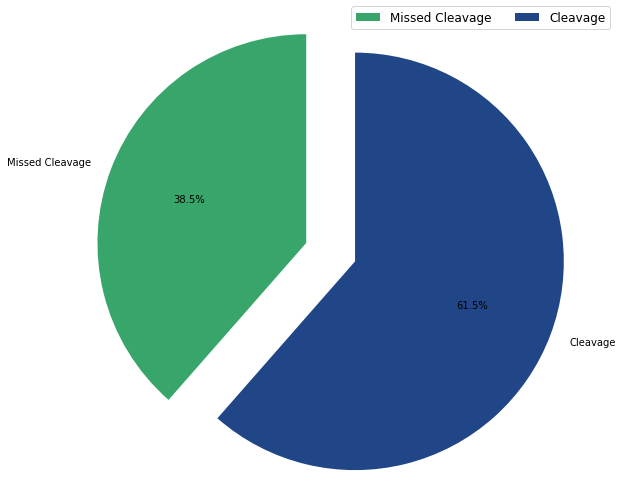

In [78]:
# Calculate the frequencies of missed cleavages with value 1
missed_cleavages = df['Cleavage'].value_counts().loc[1]

# Calculate the frequencies of all cleavages
total_cleavages = len(df)

# Calculate the frequencies of missed cleavages with value 0
no_missed_cleavages = total_cleavages - missed_cleavages

# Create array of y-axis values
y_axis = np.array([missed_cleavages, no_missed_cleavages])

# Create array of colors
mycolors = ["#38a66a", "#204687"]

plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(y_axis, labels=["Missed Cleavage", "Cleavage"], autopct='%1.1f%%',
        colors=mycolors, startangle=90, explode=[0.3, 0], radius=1.2)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=12, ncol=2)
plt.show()

In [79]:
df['Last_AA'].value_counts()

R    279
K    212
L      1
V      1
Name: Last_AA, dtype: int64

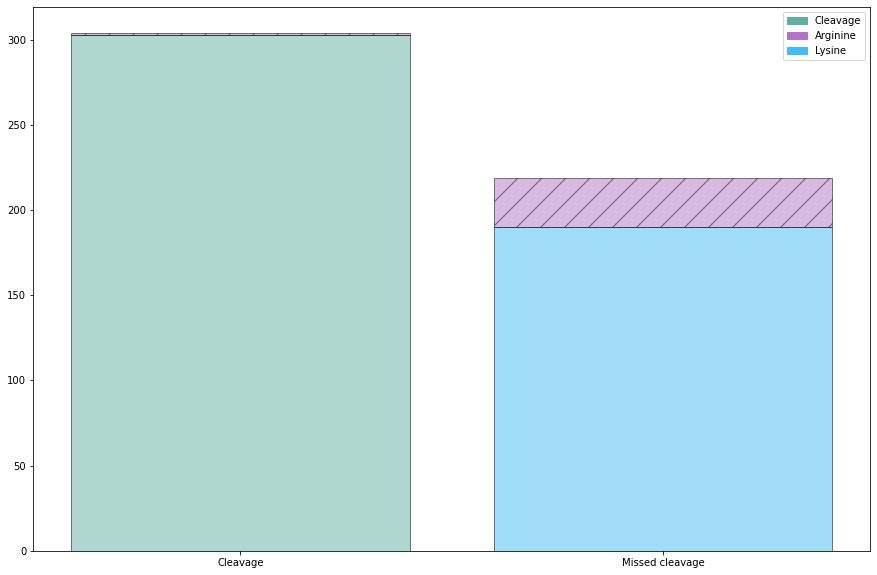

In [80]:
import matplotlib.patches as mpatches

x= ['Cleavage', 'Missed cleavage']
y= [len(Cleavage), len(Miss_cleavage)]
y1= [1,29]
plt.figure(figsize=(15, 10))
plt.bar(x, y, color=["#61afa1",'#42bcf5'], width=0.8, alpha=0.5, edgecolor='black', linewidth=1)
plt.bar(x, y1, color= "#b175c7", width=0.8, alpha=0.5, bottom=y, hatch='/', edgecolor='black', linewidth=1)

Cleavage1 = mpatches.Patch(color='#61afa1', label='Cleavage')
Lysine = mpatches.Patch(color='#b175c7', label='Arginine')
Arginine = mpatches.Patch(color='#42bcf5', label='Lysine')


plt.legend(handles= [Cleavage1, Lysine, Arginine])
plt.show()

In [81]:
df_miss_cleavage['Last_AA'].value_counts()

K    114
R     76
Name: Last_AA, dtype: int64

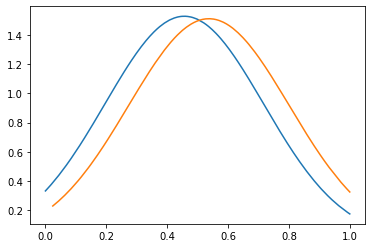

In [82]:
hmean = np.mean(h)
kmean = np.mean(k)

hstd = np.std(h)
kstf= np.std(k)

pdf = stats.norm.pdf(h, hmean, hstd)
pdf1 = stats.norm.pdf(k, kmean, kstf)

plt.plot(h, pdf) 
plt.plot(k, pdf1)

plt.show()

In [83]:
from scipy.stats import ttest_ind

df1 = df[df['relative ASA'] != '']



cat1 = df1[df1['Cleavage']==0]
cat2 = df1[df1['Cleavage']==1]

ttest_ind(Cleavage, Miss_cleavage)

Ttest_indResult(statistic=-3.3319381015853353, pvalue=0.0009274830767836289)

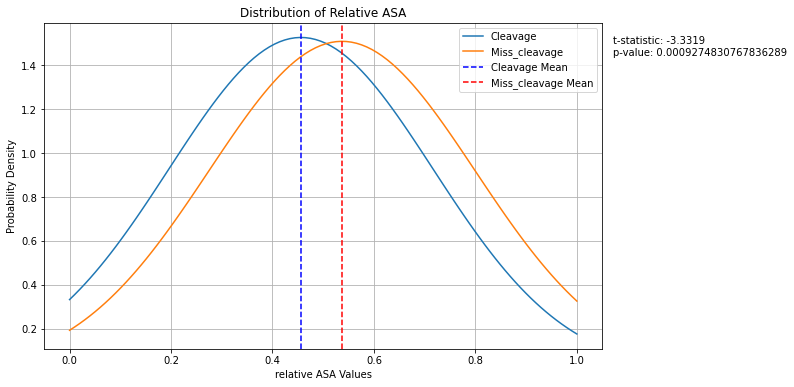

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind

# Perform independent t-test
t_statistic, p_value = ttest_ind(Cleavage, Miss_cleavage)

# Generate probability distribution for each group
x = np.linspace(min(min(Cleavage), min(Miss_cleavage)), max(max(Cleavage), max(Miss_cleavage)), 100)
pdf1 = t.pdf(x, df=len(Cleavage)-1, loc=np.mean(Cleavage), scale=np.std(Cleavage))
pdf2 = t.pdf(x, df=len(Miss_cleavage)-1, loc=np.mean(Miss_cleavage), scale=np.std(Miss_cleavage))

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Plot probability distribution graphs
plt.plot(x, pdf1, label='Cleavage')
plt.plot(x, pdf2, label='Miss_cleavage')


# Add mean thresholds
plt.axvline(np.mean(Cleavage), color='blue', linestyle='--', label='Cleavage Mean')
plt.axvline(np.mean(Miss_cleavage), color='red', linestyle='--', label='Miss_cleavage Mean')

# Set the y-limits to include the full gradient
#plt.ylim([0, max(max(pdf1), max(pdf2)) * 1.1])  # Adjust the multiplier (1.1) as needed

#Adding lables
plt.xlabel('relative ASA Values')
plt.ylabel('Probability Density')
plt.title('Distribution of Relative ASA')
plt.legend()
plt.grid(True)

# Display t-test result
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)

# Show the plot
plt.show()


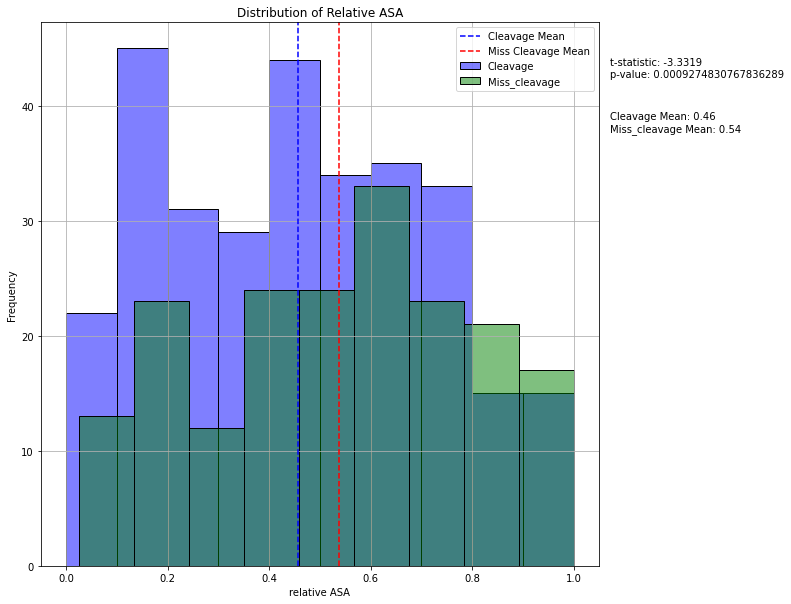

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind
import seaborn as sns

# Assuming you have already defined 'Cleavage' and 'Miss_cleavage' arrays

# Perform independent t-test
t_statistic, p_value = ttest_ind(Cleavage, Miss_cleavage)

# Generate probability distribution for each group
x = np.linspace(min(min(Cleavage), min(Miss_cleavage)), max(max(Cleavage), max(Miss_cleavage)), 100)
pdf1 = t.pdf(x, df=len(Cleavage)-1, loc=np.mean(Cleavage), scale=np.std(Cleavage))
pdf2 = t.pdf(x, df=len(Miss_cleavage)-1, loc=np.mean(Miss_cleavage), scale=np.std(Miss_cleavage))

# Increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot probability density curves
#plt.plot(x, pdf1, color='blue', linestyle='-', label='Cleavage')plt.plot(x, pdf2, color='red', linestyle='-', label='Miss_cleavage')

# Overlay histograms or KDE plots
sns.histplot(Cleavage, color='blue', alpha=0.5, label='Cleavage')
sns.histplot(Miss_cleavage, color='green', alpha=0.5, label='Miss_cleavage')

# Add mean thresholds
plt.axvline(np.mean(Cleavage), color='blue', linestyle='--', label='Cleavage Mean')
plt.axvline(np.mean(Miss_cleavage), color='red', linestyle='--', label='Miss Cleavage Mean')

# Adding labels
plt.xlabel('relative ASA')
plt.ylabel('Frequency')
plt.title('Distribution of Relative ASA')
plt.legend()
plt.grid(True)

# Display t-test result and additional statistics
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)
plt.text(1.02, 0.8, f"Cleavage Mean: {np.mean(Cleavage):.2f}\nMiss_cleavage Mean: {np.mean(Miss_cleavage):.2f}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [86]:
print(len(Cleavage))
print(len(Miss_cleavage))

303
190


In [87]:
from Bio.PDB.ResidueDepth import ResidueDepth
def Residue_Depth_and_SASA(df):
    "Prints Residue Depth and SASA calculation to the dataframe"
    PA.get_residue_depth_name(df)
    PA.add_values(df)
    PA.generating_sasa_columns(df)
    return df

In [88]:
df=Residue_Depth_and_SASA(df)
df

146
P98179
The file exists!
P62081
The file exists!
O60220
The file exists!
P08238
The file exists!
P46109
The file exists!
Q8NBJ5
The file exists!
P62906
The file exists!
P10599
The file exists!
P56381
The file exists!
P37837
The file exists!
P32119
The file exists!
P82932
The file exists!
P52907
The file exists!
Q9H773
The file exists!
P62857
The file exists!
P35232
The file exists!
Q08211
The file exists!
Q9BVK6
The file exists!
Q9BVG4
The file exists!
P04040
The file exists!
P23526
The file exists!
P04406
The file exists!
P16152
The file exists!
P19338
The file exists!
P62263
The file exists!
P51991
The file exists!
P46781
The file exists!
P25685
The file exists!
P10644
The file exists!
P10809
The file exists!
Q13253
The file exists!
P13667
The file exists!
Q10713
The file exists!
P62851
The file exists!
P29762
The file exists!
Q9Y446
The file exists!
Q08380
The file exists!
P18077
The file exists!
Q14696
The file exists!
P04792
The file exists!
Q9NZT1
The file exists!
P22626
The f

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,2 Oxidation (M),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Deamidation (NQ),Oxidation (M),"Oxidation (M),Deamidation (NQ)",Unmodified,res_depth,ca_depth,SASA
0,VAILKANLR,P55072,Unmodified,654,662,VAILK,K,658,1,H,...,0,0,0,0,0,0,1,2.013036,1.999488,98.59
1,VAILKANLR,P55072,Unmodified,654,662,ANLR,R,662,0,T,...,0,0,0,0,0,0,1,1.847657,1.999787,120.96
2,AAAAVVAAAAR,Q8WWH5,Unmodified,39,49,AAAAVVAAAAR,R,49,0,H,...,0,0,0,0,0,0,1,1.898200,1.999520,158.21
3,LTDEEVEMTR,Q10713,Oxidation (M),176,185,LTDEEVEMTR,R,185,0,H,...,0,0,0,0,1,0,0,2.199608,2.906158,41.88
4,VGVNGFGR,P04406,Deamidation (NQ),6,13,VGVNGFGR,R,13,0,H,...,0,0,0,1,0,0,0,2.146477,2.388400,61.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,53,73,LVNACLAEELPHIHAFEQK,K,73,0,E,...,0,0,0,0,0,0,1,2.230320,1.999845,85.31
513,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,YPYQSFQTPQHPSFLFQDK,K,474,1,-,...,0,0,0,0,0,0,1,2.188146,1.999731,88.70
514,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,R,R,475,0,E,...,0,0,0,0,0,0,1,1.828741,2.240109,131.15
515,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,157,173,AR,R,158,1,H,...,0,0,0,0,0,0,1,2.190687,2.672654,46.48


In [89]:
df_sasa= df

In [90]:
df_sasa.to_csv('sasa_dataframe_Dataset4.csv') #Save the dataframe to a csv file

In [91]:
df = pd.read_csv('sasa_dataframe_Dataset4.csv')
df

,Unnamed: 0,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,...,2 Oxidation (M),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Deamidation (NQ),Oxidation (M),"Oxidation (M),Deamidation (NQ)",Unmodified,res_depth,ca_depth,SASA
0,0,VAILKANLR,P55072,Unmodified,654,662,VAILK,K,658,1,...,0,0,0,0,0,0,1,2.013036,1.999488,98.59
1,1,VAILKANLR,P55072,Unmodified,654,662,ANLR,R,662,0,...,0,0,0,0,0,0,1,1.847657,1.999787,120.96
2,2,AAAAVVAAAAR,Q8WWH5,Unmodified,39,49,AAAAVVAAAAR,R,49,0,...,0,0,0,0,0,0,1,1.898200,1.999520,158.21
3,3,LTDEEVEMTR,Q10713,Oxidation (M),176,185,LTDEEVEMTR,R,185,0,...,0,0,0,0,1,0,0,2.199608,2.906158,41.88
4,4,VGVNGFGR,P04406,Deamidation (NQ),6,13,VGVNGFGR,R,13,0,...,0,0,0,1,0,0,0,2.146477,2.388400,61.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,512,HRLVNACLAEELPHIHAFEQK,Q9H3K6,Unmodified,53,73,LVNACLAEELPHIHAFEQK,K,73,0,...,0,0,0,0,0,0,1,2.230320,1.999845,85.31
489,513,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,YPYQSFQTPQHPSFLFQDK,K,474,1,...,0,0,0,0,0,0,1,2.188146,1.999731,88.70
490,514,YPYQSFQTPQHPSFLFQDKR,Q08380,Unmodified,456,475,R,R,475,0,...,0,0,0,0,0,0,1,1.828741,2.240109,131.15
491,515,ARDHGLLIYHIPQVEPR,Q9Y676,Unmodified,157,173,AR,R,158,1,...,0,0,0,0,0,0,1,2.190687,2.672654,46.48


In [92]:
df_cleavage_res_depth= df.loc[df['Cleavage'] == 0]
df_miss_cleavage_res_depth= df.loc[df['Cleavage'] == 1]

In [93]:
res_depth_Cleavage= []
for a in df_cleavage_res_depth['res_depth']:
    res_depth_Cleavage.append(a)


b= sorted(res_depth_Cleavage)

res_depth_Miss_cleavage= []
for c in df_miss_cleavage_res_depth['res_depth']:
    res_depth_Miss_cleavage.append(c)


d= sorted(res_depth_Miss_cleavage)

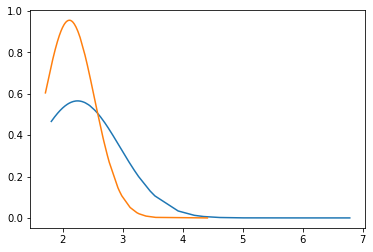

In [94]:
bmean = np.mean(b)
dmean = np.mean(d)

bstd = np.std(b)
dstf= np.std(d)

bpdf = stats.norm.pdf(b, bmean, bstd)
dpdf1 = stats.norm.pdf(d, dmean, dstf)

plt.plot(b, bpdf) 
plt.plot(d, dpdf1)

plt.show()

In [95]:
from scipy.stats import ttest_ind

df1 = df[df['res_depth'] != '']



res_depth_cat1 = df1[df1['Cleavage']==0]
res_depth_cat2 = df1[df1['Cleavage']==1]


ttest_ind(res_depth_Cleavage, res_depth_Miss_cleavage)

Ttest_indResult(statistic=2.414448302905663, pvalue=0.01612370769847377)

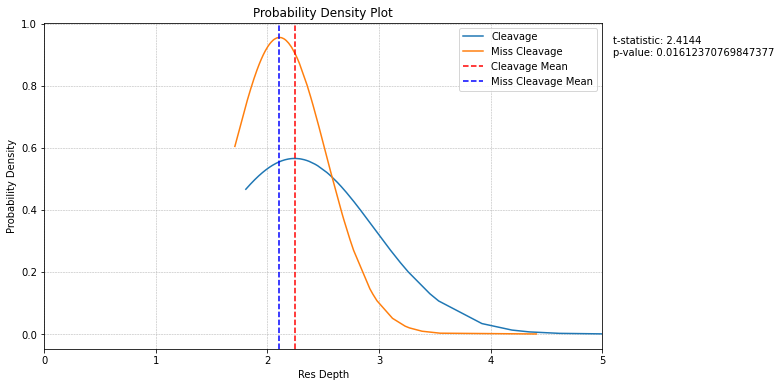

In [96]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(res_depth_Cleavage, res_depth_Miss_cleavage)

# Create lists from dataframes
res_depth_Cleavage = df_cleavage_res_depth['res_depth'].tolist()
res_depth_Miss_cleavage = df_miss_cleavage_res_depth['res_depth'].tolist()

# Sort the lists
res_depth_Cleavage.sort()
res_depth_Miss_cleavage.sort()

# Calculate mean and standard deviation
bmean = np.mean(res_depth_Cleavage)
dmean = np.mean(res_depth_Miss_cleavage)
bstd = np.std(res_depth_Cleavage)
dstf = np.std(res_depth_Miss_cleavage)

# Calculate probability density functions
bpdf = stats.norm.pdf(res_depth_Cleavage, bmean, bstd)
dpdf = stats.norm.pdf(res_depth_Miss_cleavage, dmean, dstf)

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Plot the probability density functions
plt.plot(res_depth_Cleavage, bpdf, label='Cleavage')
plt.plot(res_depth_Miss_cleavage, dpdf, label='Miss Cleavage')

# Add gridlines
plt.grid(True, linestyle='--', linewidth=0.5)

# Add thresholds
plt.axvline(bmean, color='r', linestyle='--', label='Cleavage Mean')
plt.axvline(dmean, color='b', linestyle='--', label='Miss Cleavage Mean')

# Add legend
plt.legend()

# Set axis labels and title
plt.xlabel('Res Depth')
plt.ylabel('Probability Density')
plt.title('Probability Density Plot')

# Set the limits of the x-axis
xmin = 0  # Set the lower limit of the x-axis
xmax = 5  # Set the upper limit of the x-axis
plt.xlim(xmin, xmax)

# Display t-test result
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)

# Show the plot
plt.show()


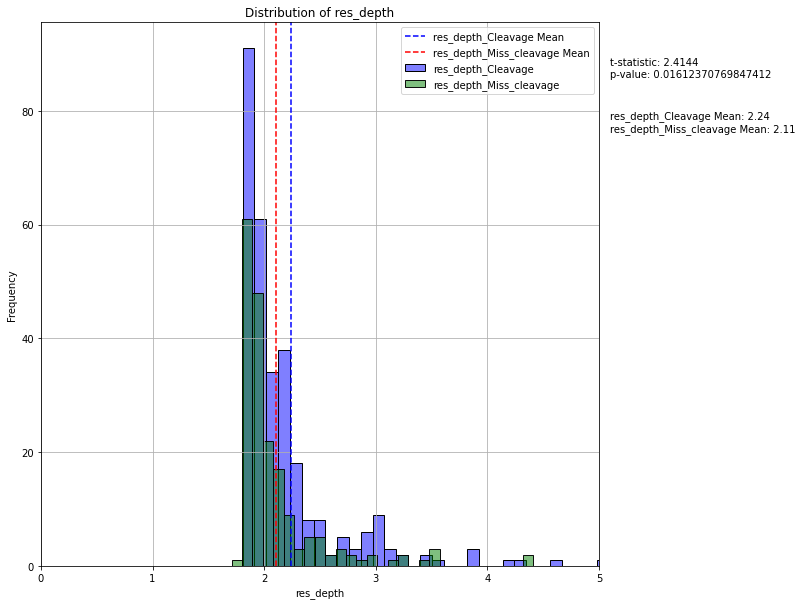

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind
import seaborn as sns

# Assuming you have already defined 'res_depth_Cleavage' and 'res_depth_Miss_cleavage' arrays

# Perform independent t-test
t_statistic, p_value = ttest_ind(res_depth_Cleavage, res_depth_Miss_cleavage)

# Generate probability distribution for each group
x = np.linspace(min(min(res_depth_Cleavage), min(res_depth_Miss_cleavage)), max(max(res_depth_Cleavage), max(res_depth_Miss_cleavage)), 100)
pdf1 = t.pdf(x, df=len(res_depth_Cleavage)-1, loc=np.mean(res_depth_Cleavage), scale=np.std(res_depth_Cleavage))
pdf2 = t.pdf(x, df=len(res_depth_Miss_cleavage)-1, loc=np.mean(res_depth_Miss_cleavage), scale=np.std(res_depth_Miss_cleavage))

# Increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot probability density curves
#plt.plot(x, pdf1, color='blue', linestyle='-', label='Cleavage')plt.plot(x, pdf2, color='red', linestyle='-', label='Miss_cleavage')

# Overlay histograms or KDE plots
sns.histplot(res_depth_Cleavage, color='blue', alpha=0.5, label='res_depth_Cleavage')
sns.histplot(res_depth_Miss_cleavage, color='green', alpha=0.5, label='res_depth_Miss_cleavage')

# Add mean thresholds
plt.axvline(np.mean(res_depth_Cleavage), color='blue', linestyle='--', label='res_depth_Cleavage Mean')
plt.axvline(np.mean(res_depth_Miss_cleavage), color='red', linestyle='--', label='res_depth_Miss_cleavage Mean')

# Adding labels
plt.xlabel('res_depth')
plt.ylabel('Frequency')
plt.title('Distribution of res_depth')
plt.legend()
plt.grid(True)

# Set the limits of the x-axis
xmin = 0  # Set the lower limit of the x-axis
xmax = 5  # Set the upper limit of the x-axis
plt.xlim(xmin, xmax)

# Display t-test result and additional statistics
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)
plt.text(1.02, 0.8, f"res_depth_Cleavage Mean: {np.mean(res_depth_Cleavage):.2f}\nres_depth_Miss_cleavage Mean: {np.mean(res_depth_Miss_cleavage):.2f}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [98]:
df_cleavage_ca_depth= df.loc[df['Cleavage'] == 0]
df_miss_cleavage_ca_depth= df.loc[df['Cleavage'] == 1]

In [99]:
ca_depth_Cleavage= []
for e in df_cleavage_ca_depth['ca_depth']:
    ca_depth_Cleavage.append(e)


f= sorted(ca_depth_Cleavage)

ca_depth_Miss_cleavage= []
for g in df_miss_cleavage_ca_depth['ca_depth']:
    ca_depth_Miss_cleavage.append(g)


I= sorted(ca_depth_Miss_cleavage)

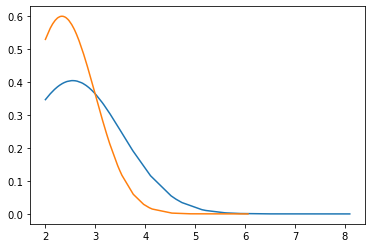

In [100]:
fmean = np.mean(f)
Imean = np.mean(I)

fstd = np.std(f)
Istf= np.std(I)

fpdf = stats.norm.pdf(f, fmean, fstd)
Ipdf1 = stats.norm.pdf(I, Imean, Istf)

plt.plot(f, fpdf) 
plt.plot(I, Ipdf1)

plt.show()

In [101]:
from scipy.stats import ttest_ind

df1 = df[df['ca_depth'] != '']



ca_depth_cat1 = df1[df1['Cleavage']==0]
ca_depth_cat2 = df1[df1['Cleavage']==1]


ttest_ind(ca_depth_Cleavage, ca_depth_Miss_cleavage)

Ttest_indResult(statistic=2.6492546213185495, pvalue=0.008326936289849698)

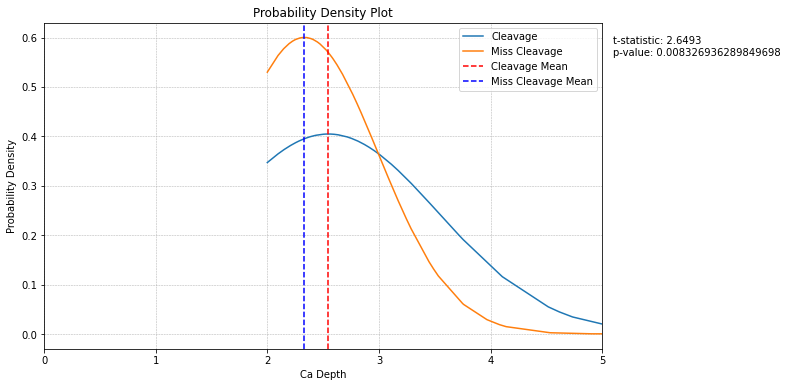

In [102]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(ca_depth_Cleavage, ca_depth_Miss_cleavage)

# Create lists from dataframes
ca_depth_Cleavage = df_cleavage_ca_depth['ca_depth'].tolist()
ca_depth_Miss_cleavage = df_miss_cleavage_ca_depth['ca_depth'].tolist()

# Sort the lists
ca_depth_Cleavage.sort()
ca_depth_Miss_cleavage.sort()


# Calculate probability density functions
bpdf = stats.norm.pdf(ca_depth_Cleavage, fmean, fstd)
dpdf = stats.norm.pdf(ca_depth_Miss_cleavage, Imean, Istf)

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Plot the probability density functions
plt.plot(ca_depth_Cleavage, fpdf, label='Cleavage')
plt.plot(ca_depth_Miss_cleavage, Ipdf1, label='Miss Cleavage')

# Add gridlines
plt.grid(True, linestyle='--', linewidth=0.5)

# Add thresholds
plt.axvline(fmean, color='r', linestyle='--', label='Cleavage Mean')
plt.axvline(Imean, color='b', linestyle='--', label='Miss Cleavage Mean')

# Add legend
plt.legend()

# Set axis labels and title
plt.xlabel('Ca Depth')
plt.ylabel('Probability Density')
plt.title('Probability Density Plot')

# Set the limits of the x-axis
xmin = 0  # Set the lower limit of the x-axis
xmax = 5  # Set the upper limit of the x-axis
plt.xlim(xmin, xmax)


# Display t-test result
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

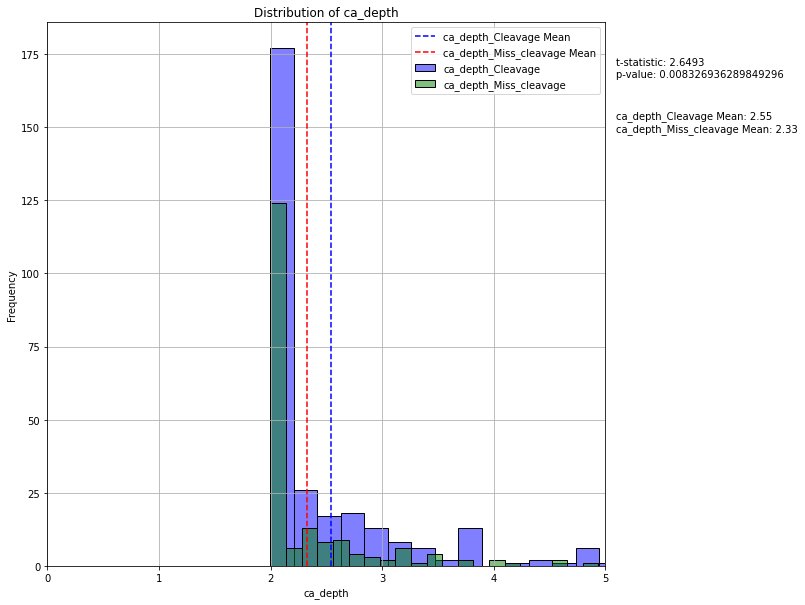

In [103]:

# Perform independent t-test
t_statistic, p_value = ttest_ind(ca_depth_Cleavage, ca_depth_Miss_cleavage)

# Generate probability distribution for each group
x = np.linspace(min(min(ca_depth_Cleavage), min(ca_depth_Miss_cleavage)), max(max(ca_depth_Cleavage), max(ca_depth_Miss_cleavage)), 100)
pdf1 = t.pdf(x, df=len(ca_depth_Cleavage)-1, loc=np.mean(ca_depth_Cleavage), scale=np.std(ca_depth_Cleavage))
pdf2 = t.pdf(x, df=len(ca_depth_Miss_cleavage)-1, loc=np.mean(ca_depth_Miss_cleavage), scale=np.std(ca_depth_Miss_cleavage))

# Increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot probability density curves
#plt.plot(x, pdf1, color='blue', linestyle='-', label='Cleavage')plt.plot(x, pdf2, color='red', linestyle='-', label='Miss_cleavage')

# Overlay histograms or KDE plots
sns.histplot(ca_depth_Cleavage, color='blue', alpha=0.5, label='ca_depth_Cleavage')
sns.histplot(ca_depth_Miss_cleavage, color='green', alpha=0.5, label='ca_depth_Miss_cleavage')

# Add mean thresholds
plt.axvline(np.mean(ca_depth_Cleavage), color='blue', linestyle='--', label='ca_depth_Cleavage Mean')
plt.axvline(np.mean(ca_depth_Miss_cleavage), color='red', linestyle='--', label='ca_depth_Miss_cleavage Mean')

# Adding labels
plt.xlabel('ca_depth')
plt.ylabel('Frequency')
plt.title('Distribution of ca_depth')
plt.legend()
plt.grid(True)

# Set the limits of the x-axis
xmin = 0  # Set the lower limit of the x-axis
xmax = 5  # Set the upper limit of the x-axis
plt.xlim(xmin, xmax)


# Display t-test result and additional statistics
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)
plt.text(1.02, 0.8, f"ca_depth_Cleavage Mean: {np.mean(ca_depth_Cleavage):.2f}\nca_depth_Miss_cleavage Mean: {np.mean(ca_depth_Miss_cleavage):.2f}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [104]:
df_cleavage_SASA= df.loc[df['Cleavage'] == 0]
df_miss_cleavage_SASA= df.loc[df['Cleavage'] == 1]

In [105]:
SASA_Cleavage= []
for j in df_cleavage_SASA['SASA']:
    SASA_Cleavage.append(j)


l= sorted(SASA_Cleavage)

SASA_Miss_cleavage= []
for m in df_miss_cleavage_SASA['SASA']:
    SASA_Miss_cleavage.append(m)


n= sorted(SASA_Miss_cleavage)

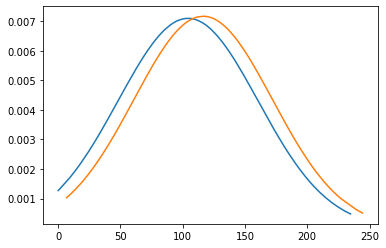

In [106]:
lmean = np.mean(l)
nmean = np.mean(n)

lstd = np.std(l)
nstf= np.std(n)

lpdf = stats.norm.pdf(l, lmean, lstd)
npdf1 = stats.norm.pdf(n, nmean, nstf)

plt.plot(l, lpdf) 
plt.plot(n, npdf1)

plt.show()

In [107]:
from scipy.stats import ttest_ind

df1 = df[df['SASA'] != '']



SASA_cat1 = df1[df1['Cleavage']==0]
SASA_cat2 = df1[df1['Cleavage']==1]


ttest_ind(SASA_Cleavage, SASA_Miss_cleavage)

Ttest_indResult(statistic=-2.339783446565298, pvalue=0.019694703188400064)

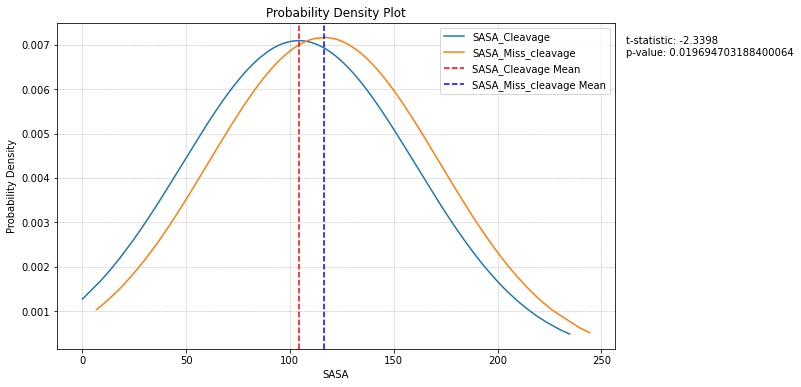

In [108]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(SASA_Cleavage, SASA_Miss_cleavage)

# Create lists from dataframes
SASA_Cleavage = df_cleavage_SASA['SASA'].tolist()
SASA_Miss_cleavage = df_miss_cleavage_SASA['SASA'].tolist()

# Sort the lists
SASA_Cleavage.sort()
SASA_Miss_cleavage.sort()


# Calculate probability density functions
bpdf = stats.norm.pdf(SASA_Cleavage, lmean, lstd)
dpdf = stats.norm.pdf(SASA_Miss_cleavage, nmean, nstf)

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Plot the probability density functions
plt.plot(SASA_Cleavage, lpdf, label='SASA_Cleavage')
plt.plot(SASA_Miss_cleavage, npdf1, label='SASA_Miss_cleavage')

# Add gridlines
plt.grid(True, linestyle='--', linewidth=0.5)

# Add thresholds
plt.axvline(lmean, color='r', linestyle='--', label='SASA_Cleavage Mean')
plt.axvline(nmean, color='b', linestyle='--', label='SASA_Miss_cleavage Mean')

# Add legend
plt.legend()

# Set axis labels and title
plt.xlabel('SASA')
plt.ylabel('Probability Density')
plt.title('Probability Density Plot')

# Display t-test result
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

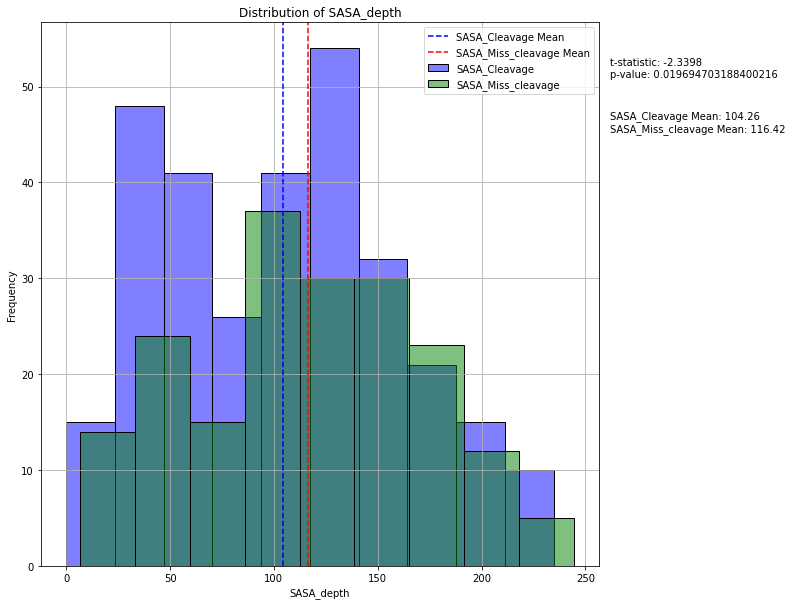

In [109]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(SASA_Cleavage, SASA_Miss_cleavage)

# Generate probability distribution for each group
x = np.linspace(min(min(SASA_Cleavage), min(SASA_Miss_cleavage)), max(max(SASA_Cleavage), max(SASA_Miss_cleavage)), 100)
pdf1 = t.pdf(x, df=len(SASA_Cleavage)-1, loc=np.mean(SASA_Cleavage), scale=np.std(SASA_Cleavage))
pdf2 = t.pdf(x, df=len(SASA_Miss_cleavage)-1, loc=np.mean(SASA_Miss_cleavage), scale=np.std(SASA_Miss_cleavage))

# Increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot probability density curves
#plt.plot(x, pdf1, color='blue', linestyle='-', label='Cleavage')plt.plot(x, pdf2, color='red', linestyle='-', label='Miss_cleavage')

# Overlay histograms or KDE plots
sns.histplot(SASA_Cleavage, color='blue', alpha=0.5, label='SASA_Cleavage')
sns.histplot(SASA_Miss_cleavage, color='green', alpha=0.5, label='SASA_Miss_cleavage')

# Add mean thresholds
plt.axvline(np.mean(SASA_Cleavage), color='blue', linestyle='--', label='SASA_Cleavage Mean')
plt.axvline(np.mean(SASA_Miss_cleavage), color='red', linestyle='--', label='SASA_Miss_cleavage Mean')

# Adding labels
plt.xlabel('SASA_depth')
plt.ylabel('Frequency')
plt.title('Distribution of SASA_depth')
plt.legend()
plt.grid(True)

# Display t-test result and additional statistics
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)
plt.text(1.02, 0.8, f"SASA_Cleavage Mean: {np.mean(SASA_Cleavage):.2f}\nSASA_Miss_cleavage Mean: {np.mean(SASA_Miss_cleavage):.2f}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [110]:
#change cleavage values from 0 to 1 if the peptide has a duplicate that has cleavage value1
df['Cleavage']= df.duplicated(subset=[ 'ProteinID','cleavage_sites', 'LastAA_position'], keep=False) #keep=False to drop duplicates
df['Cleavage']= df['Cleavage'].astype(int) #convert to int

In [111]:

def check_duplicates(df, seq, elem_id, res_depth, Cleavage):
    
    different_groups = True if df[(df.cleavage_sites == seq) & (df.res_depth == res_depth) & (df.ProteinID == elem_id)]['Cleavage'].nunique() > 1 else False 
    sequence_dupls = True if len(df[df.cleavage_sites == seq]) > 1 else False
    id_dupls = True if len(df[df.ProteinID == elem_id]) > 1 else False
    res_depth_dupls = True if len(df[df.res_depth == res_depth]) > 1 else False
    
    if sequence_dupls and id_dupls and res_depth_dupls and different_groups:
        return 1 
    else:
        return Cleavage


df['Cleavage'] = df.apply(lambda row: check_duplicates(df, row.cleavage_sites, row.ProteinID, row.res_depth,row.Cleavage), axis=1)


# Machine learning #

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [113]:
print(df.columns)

Index(['Unnamed: 0', 'Sequence', 'ProteinID', 'Modifications', 'start', 'end',
       'cleavage_sites', 'Last_AA', 'LastAA_position', 'Cleavage',
       'secondary_structure', 'relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'S', 'T', '2 Oxidation (M)',
       'Acetyl (Protein N-term),2 Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Deamidation (NQ)',
       'Oxidation (M)', 'Oxidation (M),Deamidation (NQ)', 'Unmodified',
       'res_depth', 'ca_depth', 'SASA'],
      dtype='object')


In [114]:
df_miss_cleavage= df.loc[df['Cleavage'] == 1]
len(df_miss_cleavage)

122

In [115]:
df_cleavage= df.loc[df['Cleavage'] == 0]
df_cleavage= df_cleavage.sample(n=122)
df_test= pd.concat([df_miss_cleavage, df_cleavage])

In [116]:
df_test.to_csv('df_test1_Dataset4.csv', index=False)

In [117]:
df_test['Cleavage'].value_counts()

1    122
0    122
Name: Cleavage, dtype: int64

In [118]:
df_test

,Unnamed: 0,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,...,2 Oxidation (M),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Deamidation (NQ),Oxidation (M),"Oxidation (M),Deamidation (NQ)",Unmodified,res_depth,ca_depth,SASA
4,4,VGVNGFGR,P04406,Deamidation (NQ),6,13,VGVNGFGR,R,13,1,...,0,0,0,1,0,0,0,2.146477,2.388400,61.95
5,5,VGVNGFGR,P04406,Deamidation (NQ),6,13,VGVNGFGR,R,13,1,...,0,0,0,1,0,0,0,2.146477,2.388400,61.95
14,15,AKFEELNMDLFR,P11021,Unmodified,325,336,FEELNMDLFR,R,336,1,...,0,0,0,0,0,0,1,1.966974,2.206745,138.76
23,25,QATKDAGQISGLNVLR,P38646,Unmodified,203,218,DAGQISGLNVLR,R,218,1,...,0,0,0,0,0,0,1,2.126017,1.999490,40.92
27,29,FGYVDFESAEDLEK,P19338,Unmodified,349,362,FGYVDFESAEDLEK,K,362,1,...,0,0,0,0,0,0,1,1.914777,1.999464,76.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,303,VLQNHHSKSPVDVLQIFR,Q9UKK3,Unmodified,399,416,SPVDVLQIFR,R,416,0,...,0,0,0,0,0,0,1,2.117799,2.805090,85.30
215,231,CAADLGLNKGYR,P49773,Unmodified,84,95,CAADLGLNK,K,92,0,...,0,0,0,0,0,0,1,1.870644,1.999583,218.30
18,20,TFAPEEISAMVLTK,P11021,Unmodified,139,152,TFAPEEISAMVLTK,K,152,0,...,0,0,0,0,0,0,1,2.755337,3.111272,32.51
195,211,KYEMFAQTLQQSR,P55072,Oxidation (M),754,766,YEMFAQTLQQSR,R,766,0,...,0,0,0,0,1,0,0,1.847669,1.999781,135.31


In [119]:
missing_columns = df_test.columns[df_test.isna().any()].tolist()
print(missing_columns)

[]


In [120]:
column_name = 'SASA'  # Replace 'Column1' with your actual column name
df_test[column_name] = df_test[column_name].fillna(0)

In [121]:
df_test['SASA']

4       61.95
5       61.95
14     138.76
23      40.92
27      76.51
        ...  
287     85.30
215    218.30
18      32.51
195    135.31
424    105.63
Name: SASA, Length: 244, dtype: float64

In [122]:
x = df_test[['relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'S', 'T', '2 Oxidation (M)',
       'Acetyl (Protein N-term),2 Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Deamidation (NQ)',
       'Oxidation (M)', 'Oxidation (M),Deamidation (NQ)', 'Unmodified',
       'res_depth', 'ca_depth', 'SASA']]
       
y = df_test['Cleavage']

In [123]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Reshape x array
x_reshaped = x_scaled.reshape(-1, len(x.columns))

# Perform PCA
pca = PCA()
x_pca = pca.fit_transform(x_reshaped)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Print the variance explained by each principal component
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.4f}")

# You can also access the principal components themselves
principal_components = pca.components_

# Accessing the first two principal components (for visualization purposes, if desired)
pc1 = x_pca[:, 0]
pc2 = x_pca[:, 1]

Principal Component 1: 0.1525
Principal Component 2: 0.1112
Principal Component 3: 0.0824
Principal Component 4: 0.0693
Principal Component 5: 0.0635
Principal Component 6: 0.0494
Principal Component 7: 0.0451
Principal Component 8: 0.0409
Principal Component 9: 0.0392
Principal Component 10: 0.0379
Principal Component 11: 0.0374
Principal Component 12: 0.0368
Principal Component 13: 0.0355
Principal Component 14: 0.0330
Principal Component 15: 0.0310
Principal Component 16: 0.0253
Principal Component 17: 0.0221
Principal Component 18: 0.0206
Principal Component 19: 0.0173
Principal Component 20: 0.0148
Principal Component 21: 0.0124
Principal Component 22: 0.0104
Principal Component 23: 0.0050
Principal Component 24: 0.0034
Principal Component 25: 0.0025
Principal Component 26: 0.0011
Principal Component 27: 0.0000
Principal Component 28: 0.0000


0.9999999999999997


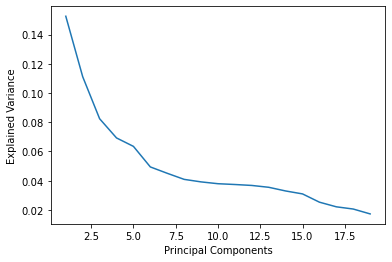

In [124]:
print(pca.explained_variance_ratio_.sum())
plt.plot(range(1, 20), pca.explained_variance_ratio_[:19])
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")
plt.show()
# observations:
#each PC captures less than the first, as expected.
#first 2 PCs capture 

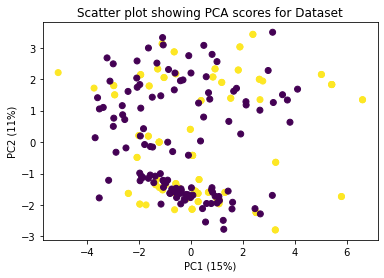

In [125]:
import matplotlib.pyplot as plt

# Replace sample_colours with your numerical variable for color mapping
sample_colours = df_test['Cleavage'].values

# Plotting the scatter plot using the first two principal components
plt.scatter(pc1, pc2, c=sample_colours, cmap='viridis')
plt.xlabel('PC1 (' + str(round(explained_variance[0] * 100)) + '%)')
plt.ylabel('PC2 (' + str(round(explained_variance[1] * 100)) + '%)')
plt.title('Scatter plot showing PCA scores for Dataset')

# Show the plot
plt.show()

In [126]:
len(df_test['Cleavage'])

244

In [127]:
# from sklearn.tree import plot_tree

# X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# clf = RandomForestClassifier(n_estimators=1000)
# clf.fit(X_train,y_train)
# y_pred=clf.predict(X_test)

In [128]:
from sklearn.tree import plot_tree

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [129]:
# from Bio.PDB.ResidueDepth import ResidueDepth
# from Bio.PDB.SASA import ShrakeRupley
# from sklearn.model_selection import train_test_split
# from sklearn.utils import resample
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# # Define the random forest classifier
# clf = RandomForestClassifier(n_estimators=1000, random_state=42)

# # Define the number of bootstrap iterations
# n_iterations = 100

# # Define a list to store the accuracy scores for each iteration
# scores = []

# # Perform bootstrap validation
# for i in range(n_iterations):
#     # Generate a bootstrap sample from the training data
#     X_train_boot, y_train_boot = resample(X_train, y_train, random_state=i)

#     # Train the random forest classifier on the bootstrap sample
#     clf.fit(X_train_boot, y_train_boot)
    
#     # Predict the classes of the testing data
#     y_pred = clf.predict(X_test)
    
#     # Compute the accuracy score on the testing data
#     score = accuracy_score(y_test, y_pred)
    
#     # Store the accuracy score for this iteration
#     scores.append(score)

# # Calculate the mean and standard deviation of the accuracy scores
# mean_score = np.mean(scores)
# std_score = np.std(scores)

# # Print the results
# print("Bootstrap validation results:")
# print("Mean accuracy score:", mean_score)
# print("Standard deviation of accuracy scores:", std_score)


Accuracy:  0.7868852459016393


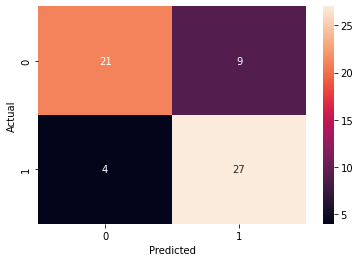

In [130]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy: 0.7868852459016393


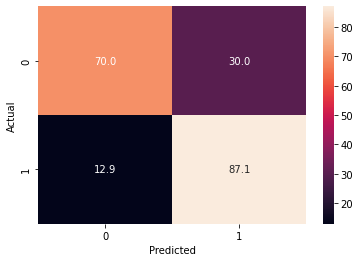

In [131]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Calculate row-wise percentages
row_sums = confusion_matrix.sum(axis=1)
confusion_matrix_percent = confusion_matrix.div(row_sums, axis=0) * 100

# Display the confusion matrix with percentages
sn.heatmap(confusion_matrix_percent, annot=True, fmt=".1f")  # Use ".1f" to display one decimal place

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
plt.show()

In [133]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

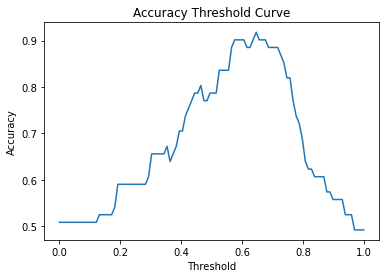

In [134]:
thresholds = np.linspace(0, 1, num=100)
accuracies = []
for threshold in thresholds:
    y_pred_threshold = (clf.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    accuracies.append(accuracy)

plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Threshold Curve')
plt.show()

In [135]:
# Compute the confidence scores for the testing data
y_confidence = clf.predict_proba(X_test)
y_confidence = [probability[1] for probability in y_confidence]
y_confidence_formatted = ["{:.3f}".format(num) for num in y_confidence]

In [136]:
# Compare predictions with truth values
ProteinIDs=df['ProteinID'].tolist()
data_frame=pd.DataFrame({'relative ASA':X_test['relative ASA'] ,'Prediction':y_pred,'Probability':y_confidence_formatted})
merged_df = pd.merge(data_frame, df, on='relative ASA')
merged_df = merged_df[['ProteinID', 'start', 'end', 'cleavage_sites', 'Cleavage', 'Prediction','Probability']]
print(merged_df)

    ProteinID  start  end      cleavage_sites  Cleavage  Prediction  \
0      P62306     66   73            CNNVLYIR         0           1   
1      P10809    463  470                   R         1           1   
2      P10809    463  470             IGIEIIK         0           1   
3      P10809    463  470                   R         1           1   
4      P16152    135  145         VVNVSSIMSVR         1           1   
..        ...    ...  ...                 ...       ...         ...   
180    P38646    207  218        DAGQISGLNVLR         1           0   
181    O15355    338  350         QLIVANAGDSR         0           0   
182    P11021    307  324  IEIESFYEGEDFSETLTR         0           0   
183    Q15181    178  192                   R         0           0   
184    P13639    416  428                  VR         0           0   

    Probability  
0         0.816  
1         0.816  
2         0.816  
3         0.816  
4         0.738  
..          ...  
180       0.173  
181

In [137]:
# select rows where the value in Prediction is equal to 1
df_ones = merged_df[merged_df['Prediction'] == 1]

# sort the resulting dataframe by the values in Probability in ascending order
df_ones_sorted = df_ones.sort_values('Probability', ascending=True)

# select the first row with the lowest Probability
result = df_ones_sorted.iloc[0]
threshold=result['Probability']
print(threshold)

0.522


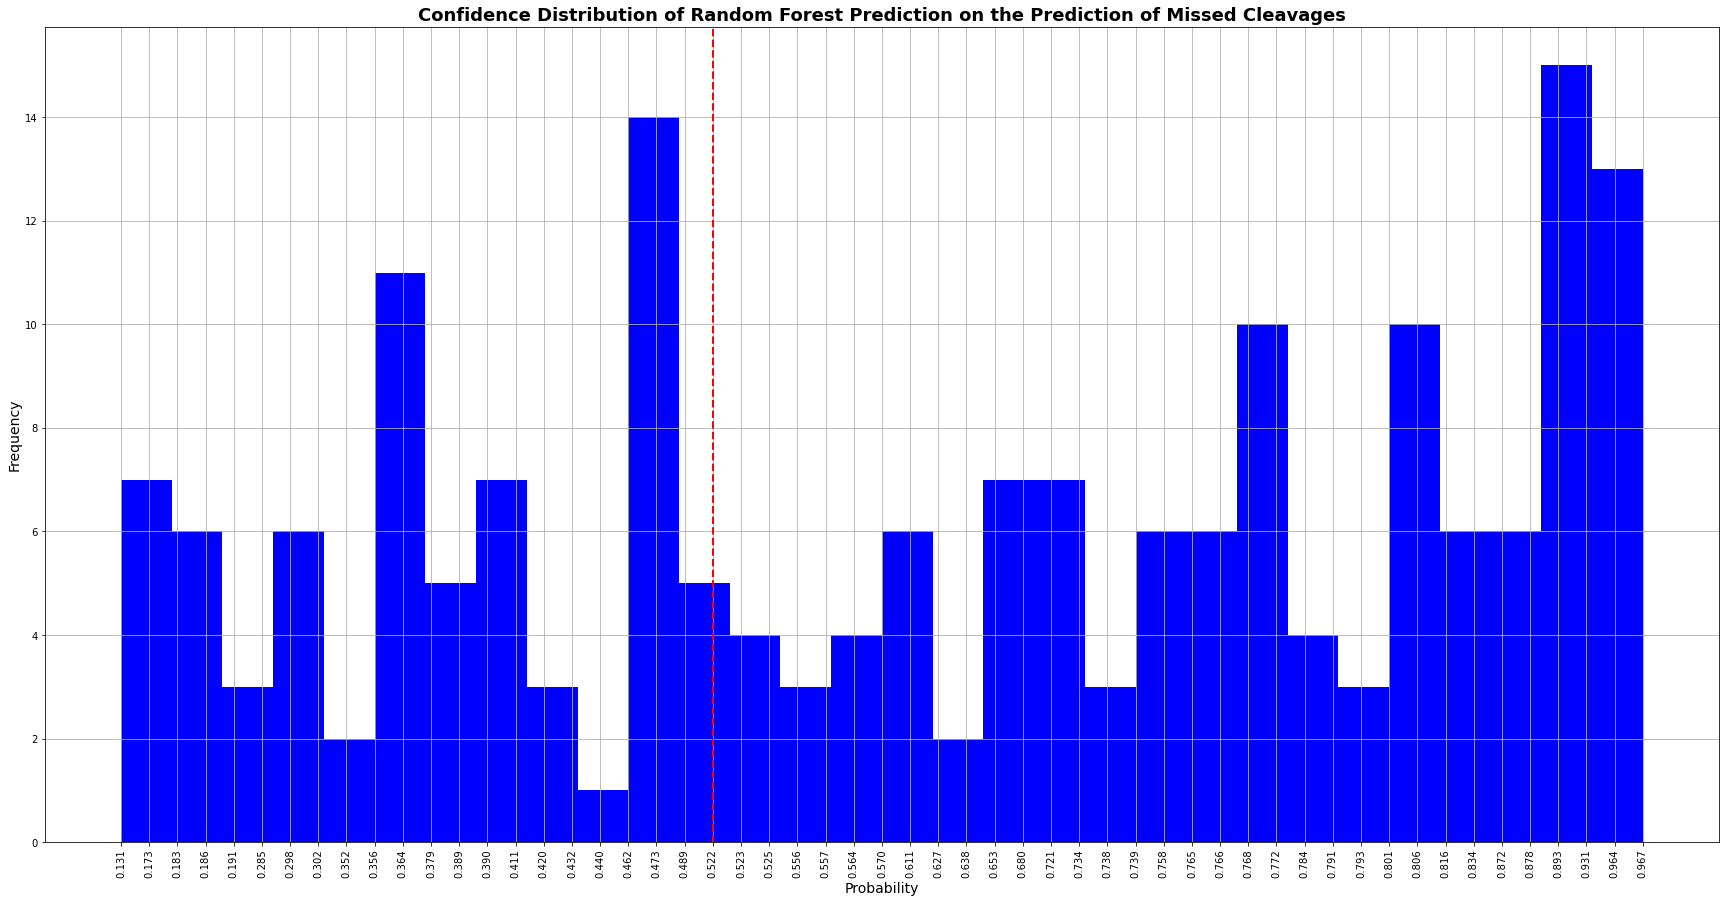

In [138]:
# Sort the Order_df dataframe by the 'end' column
Order_df = merged_df.sort_values('Probability')


# Create a figure and an axis object for the plot
fig, ax1 = plt.subplots(figsize=(30, 15))

# Add a histogram to the axis object
ax1.hist(Order_df['Probability'], bins=30, color='blue')
ax1.set_xlabel('Probability', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
plt.title('Confidence Distribution of Random Forest Prediction on the Prediction of Missed Cleavages', fontsize=18, fontweight='bold')

# Customize the appearance of the plot
ax1.set_ylim(0)  # Set the y-axis limits for the first axis

# Add a vertical line at the threshold value
#threshold = 0.5
ax1.axvline(threshold, color='red', linestyle='dashed', linewidth=2)

# rotate x-axis label
plt.xticks(rotation=90)

# Add grid
plt.grid(True)

# Display plot
plt.show()

In [139]:
# Set the threshold value
threshold = input('Input threshold:')

# Filter the dataframe based on the threshold value
filtered_df = merged_df[merged_df['Probability'] > threshold]

# Print the filtered dataframe
print(filtered_df)

Input threshold: 0.522


    ProteinID  start  end    cleavage_sites  Cleavage  Prediction Probability
0      P62306     66   73          CNNVLYIR         0           1       0.816
1      P10809    463  470                 R         1           1       0.816
2      P10809    463  470           IGIEIIK         0           1       0.816
3      P10809    463  470                 R         1           1       0.816
4      P16152    135  145       VVNVSSIMSVR         1           1       0.738
..        ...    ...  ...               ...       ...         ...         ...
171    Q9NZT1     89  104  AFDQDGDGHITVDELR         1           1       0.721
175    P12004    249  261            YYLAPK         0           1       0.564
176    P29762      2    9          PNFAGTWK         1           1       0.564
177    P29762      2   11          PNFAGTWK         1           1       0.564
178    P30050     17   40   CTGGEVGATSALAPK         0           1       0.564

[115 rows x 7 columns]


In [140]:
import shap

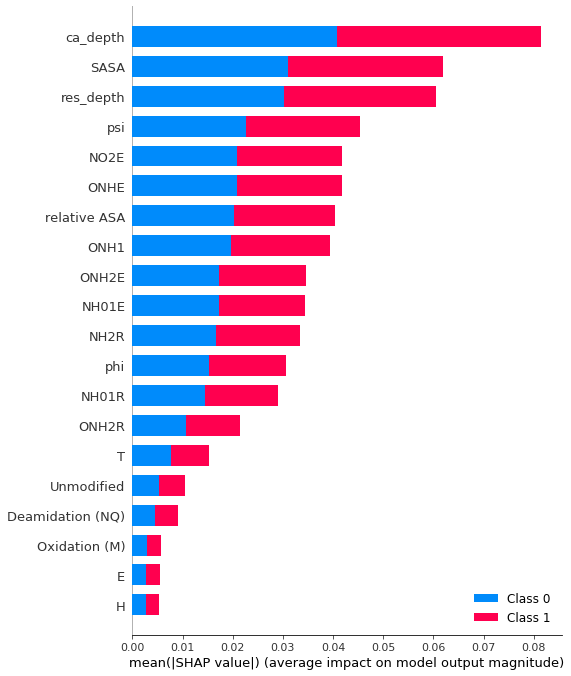

In [141]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
plt.show()

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



# XG Boost #

In [143]:
print(df.columns)

Index(['Unnamed: 0', 'Sequence', 'ProteinID', 'Modifications', 'start', 'end',
       'cleavage_sites', 'Last_AA', 'LastAA_position', 'Cleavage',
       'secondary_structure', 'relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'S', 'T', '2 Oxidation (M)',
       'Acetyl (Protein N-term),2 Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Deamidation (NQ)',
       'Oxidation (M)', 'Oxidation (M),Deamidation (NQ)', 'Unmodified',
       'res_depth', 'ca_depth', 'SASA'],
      dtype='object')


In [144]:
df_miss_cleavage= df.loc[df['Cleavage'] == 1]
len(df_miss_cleavage)

122

In [145]:
df_cleavage= df.loc[df['Cleavage'] == 0]
df_cleavage= df_cleavage.sample(n=122)
df_test= pd.concat([df_miss_cleavage, df_cleavage])

In [146]:
df_test.to_csv('df_xgboostDataset4.csv', index=False)

In [148]:
df_test['Cleavage'].value_counts()

1    122
0    122
Name: Cleavage, dtype: int64

In [151]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Loading preprocessed  data

X = df_test[['relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'S', 'T', '2 Oxidation (M)',
       'Acetyl (Protein N-term),2 Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Deamidation (NQ)',
       'Oxidation (M)', 'Oxidation (M),Deamidation (NQ)', 'Unmodified',
       'res_depth', 'ca_depth', 'SASA']]  # Features
y = df_test['Cleavage']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 3: Define the XGBoost model
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=1000)

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8032786885245902


Accuracy:  0.8032786885245902


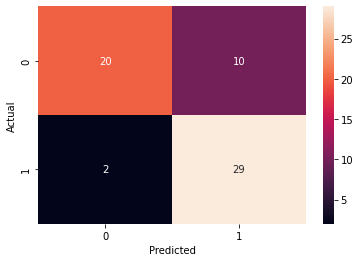

In [152]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

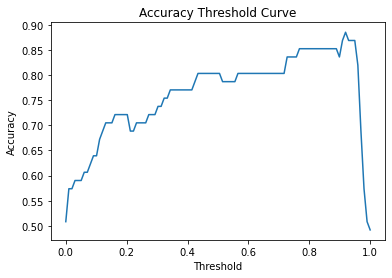

In [153]:
# Evaluate the best model on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Create the accuracy threshold curve
thresholds = np.linspace(0, 1, 100)  # Vary the threshold from 0 to 1
accuracies = []  # Store the accuracies for each threshold

for threshold in thresholds:
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)  # Apply the threshold to the predicted probabilities
    accuracy = accuracy_score(y_test, y_pred_threshold)  # Compute accuracy
    accuracies.append(accuracy)

# Plot the accuracy threshold curve
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Threshold Curve')
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


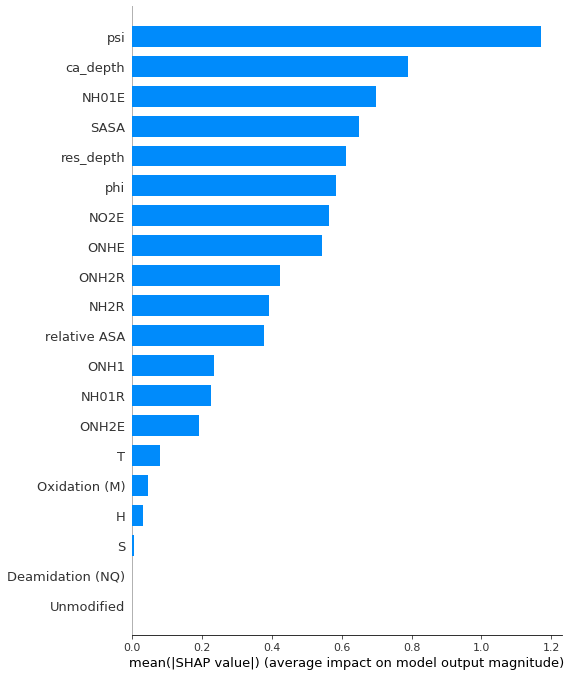

In [154]:
# Generate SHAP values using TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot detailed feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

In [155]:
#optimizing hyperpatameters

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 6, 9]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameter values and the corresponding model
best_learning_rate = grid_search.best_params_['learning_rate']
best_max_depth = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_

# Train the best model on the full training set
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.7704918032786885


Accuracy:  0.7704918032786885


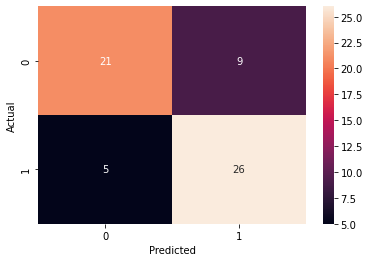

In [156]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

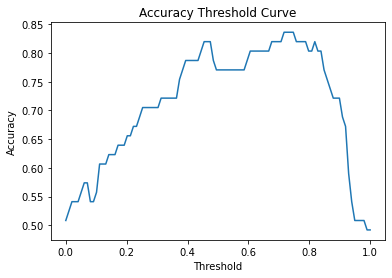

In [157]:
# Evaluate the best model on the test set
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Create the accuracy threshold curve
thresholds = np.linspace(0, 1, 100)  # Vary the threshold from 0 to 1
accuracies = []  # Store the accuracies for each threshold

for threshold in thresholds:
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)  # Apply the threshold to the predicted probabilities
    accuracy = accuracy_score(y_test, y_pred_threshold)  # Compute accuracy
    accuracies.append(accuracy)

# Plot the accuracy threshold curve
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Threshold Curve')
plt.show()

In [158]:
# Get the confidence scores
confidence_scores = best_model.predict_proba(X_test)

# Select the confidence scores for the positive class
positive_scores = confidence_scores[:, 1]


In [159]:
# Compare predictions with truth values
ProteinIDs=df['ProteinID'].tolist()
data_frame=pd.DataFrame({'relative ASA':X_test['relative ASA'] ,'Prediction':y_pred,'Probability':positive_scores})
merged_df = pd.merge(data_frame, df, on='relative ASA')
merged_df = merged_df[['ProteinID', 'start', 'end', 'cleavage_sites', 'Cleavage', 'Prediction','Probability']]
print(merged_df)

    ProteinID  start  end      cleavage_sites  Cleavage  Prediction  \
0      P62306     66   73            CNNVLYIR         0           0   
1      P10809    463  470                   R         1           0   
2      P10809    463  470             IGIEIIK         0           0   
3      P10809    463  470                   R         1           0   
4      P16152    135  145         VVNVSSIMSVR         1           1   
..        ...    ...  ...                 ...       ...         ...   
169    Q9H773     37   54           LHAEFAAER         0           0   
170    P27144      8   24         AVILGPPGSGK         0           0   
171    P13639    768  785  GHVFEESQVAGTPMFVVK         0           0   
172    P30050     58   67                ITVK         0           0   
173    P17931    187  210       QSVFPFESGKPFK         0           0   

     Probability  
0       0.492076  
1       0.492076  
2       0.492076  
3       0.492076  
4       0.852488  
..           ...  
169     0.4345

In [160]:
# select rows where the value in Prediction is equal to 1
df_ones = merged_df[merged_df['Prediction'] == 1]

# sort the resulting dataframe by the values in Probability in ascending order
df_ones_sorted = df_ones.sort_values('Probability', ascending=True)

# select the first row with the lowest Probability
result = df_ones_sorted.iloc[0]
threshold=result['Probability']
print(threshold)

0.5929256


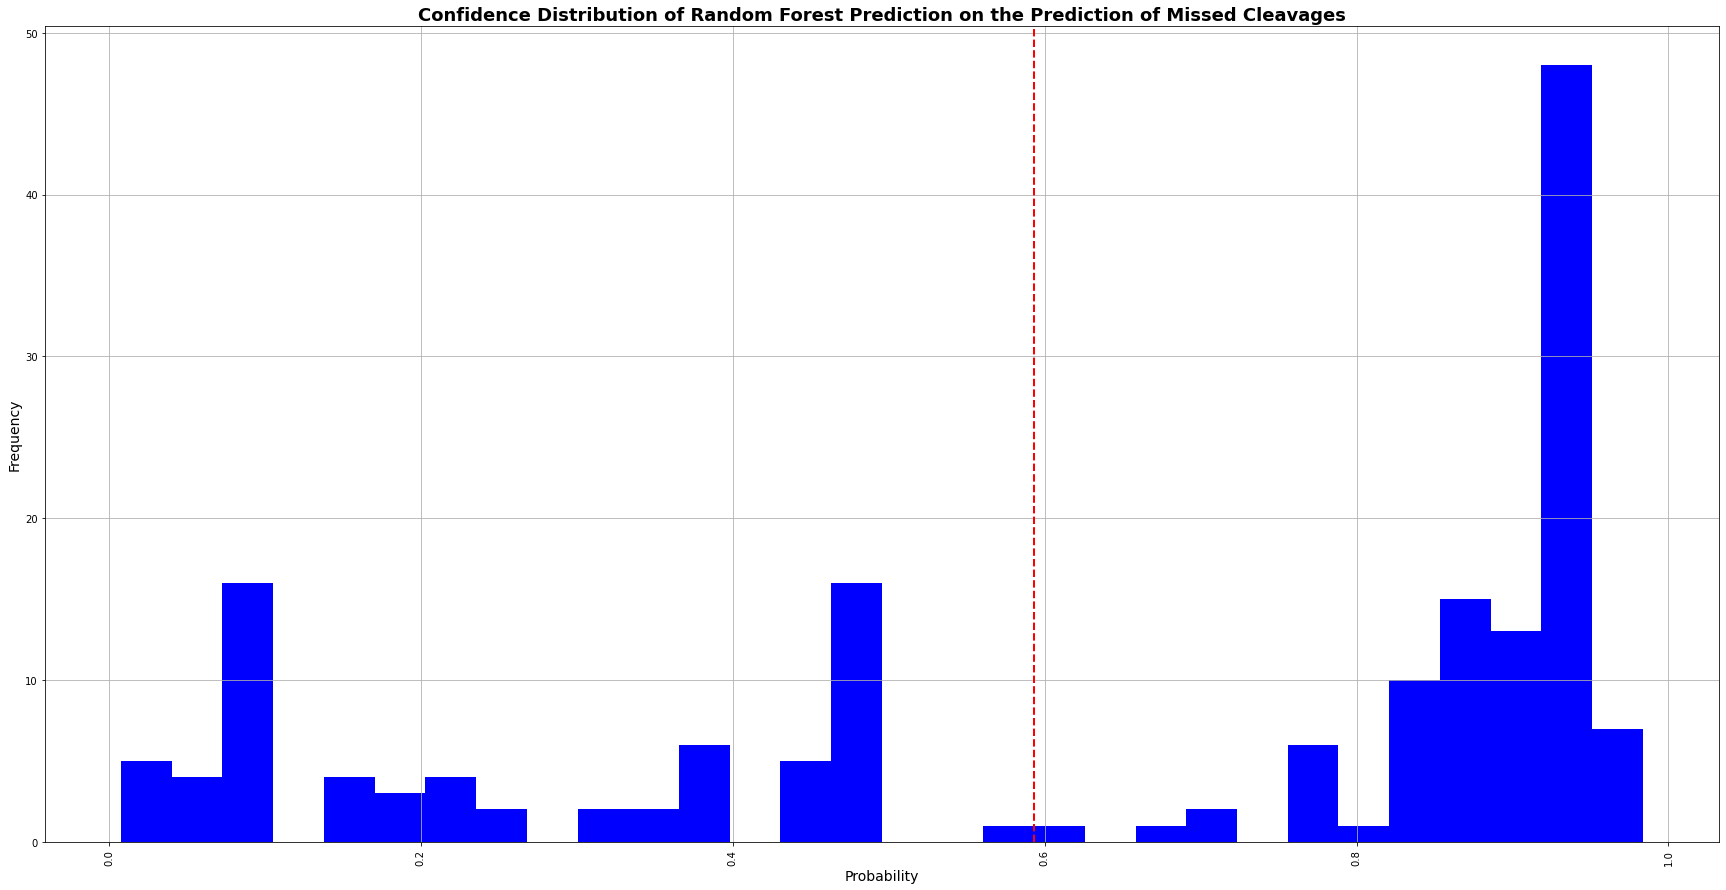

In [161]:
# Sort the Order_df dataframe by the 'end' column
Order_df = merged_df.sort_values('Probability')


# Create a figure and an axis object for the plot
fig, ax1 = plt.subplots(figsize=(30, 15))

# Add a histogram to the axis object
ax1.hist(Order_df['Probability'], bins=30, color='blue')
ax1.set_xlabel('Probability', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
plt.title('Confidence Distribution of Random Forest Prediction on the Prediction of Missed Cleavages', fontsize=18, fontweight='bold')

# Customize the appearance of the plot
ax1.set_ylim(0)  # Set the y-axis limits for the first axis

# Add a vertical line at the threshold value
#threshold = 0.5
ax1.axvline(threshold, color='red', linestyle='dashed', linewidth=2)

# rotate x-axis label
plt.xticks(rotation=90)

# Add grid
plt.grid(True)

# Display plot
plt.show()

In [162]:
# Set the threshold value
threshold = float(input('Input threshold:'))

# Filter the dataframe based on the threshold value
filtered_df = merged_df[merged_df['Probability'] > threshold]

# Print the filtered dataframe
print(filtered_df)

Input threshold: 0.5929256


    ProteinID  start  end    cleavage_sites  Cleavage  Prediction  Probability
4      P16152    135  145       VVNVSSIMSVR         1           1     0.852488
5      P16152    135  145       VVNVSSIMSVR         1           1     0.852488
6      O60783    113  125     HLADHGQLSGIQR         0           1     0.852488
8      Q8WWH5     39   49       AAAAVVAAAAR         0           1     0.712606
9      P49406     75   83         FLSPEFIPR         0           1     0.712606
..        ...    ...  ...               ...       ...         ...          ...
164    P31153    363  373            KPIYQR         1           1     0.867384
165    Q9NZT1     89  105  AFDQDGDGHITVDELR         1           1     0.867384
166    Q9NZT1     89  104  AFDQDGDGHITVDELR         1           1     0.867384
167    Q13253     99  111       EDLAELDQLLR         0           1     0.929741
168    Q8NAF0     52   61           FPYYLSR         0           1     0.596844

[104 rows x 7 columns]


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


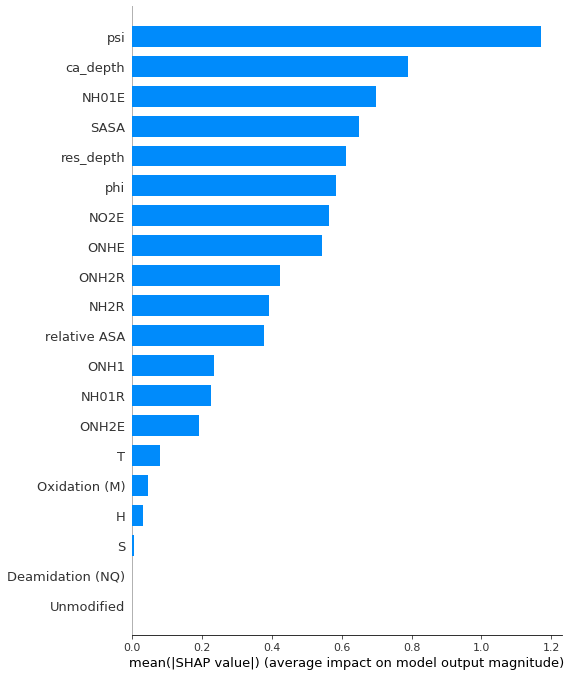

In [163]:
# Generate SHAP values using TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Plot detailed feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()